In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from unidecode import unidecode
import re
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
mypal = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Grab the color pal
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [110]:
df = pd.read_csv('/Users/mac/crawdata/bds_raw_data.csv')
print(df.shape)
df.head()

(62016, 13)


,Địa chỉ,Mức giá,Diện tích,Số phòng ngủ,Số tầng,Số toilet,Mô tả,Link,Pháp lý,Đường vào,Mặt tiền,Hướng nhà,Nội thất
0,"Đường Lê Văn Sỹ, Phường 13, Quận 3, Hồ Chí Minh",69 tỷ,210 m²,Not found,5 tầng,Not found,"- Bán tòa nhà đẹp nhất Mặt tiền Lê Văn Sỹ, Phường 13, Quận 3.- Diện tích: 9 x 23m.- Kết cấu: 5 tầng.- Vị trí tuyệt đẹp, có hẻm thoáng bên hông, quy hoạch hiện hữu rất đẹp. Vỉa hè rộng rãi.- Hợp đồng thuê: 260 triệu/tháng, ngân hàng Eximbank.- Giá: 69 tỷ TL.",https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-van-sy-phuong-13-1/ban-toa-dep-t-tien-dien-tich-9x23m-ket-cau-5-tang-cho-thue-260tr-gia-69-ty-pr40082613,Sổ đỏ/ Sổ hồng,Not found,Not found,Not found,Đầy đủ
1,"Đường Lê Đức Thọ, Phường 16, Gò Vấp, Hồ Chí Minh","20,5 tỷ",237 m²,11 phòng,5 tầng,11 phòng,"Bán nhà góc 2 mặt tiền đường Lê Đức Thọ, Phường 16, Quận Gò Vấp.- Diện tích: 12m x 25m, DTCN 237m².- Kết cấu: Trệt 4 Lầu xây dựng kiên cố, thiết kế hiện đại và đẳng cấp. Công năng gồm 11 phòng ngủ, 11 WC, nội thất cao cấp.- Tiện ích xung quanh đủ đầy: Cách nhà thiếu nhi Quận Gò Vấp 100m, gần Cityland 2 phút đi xe máy, bán kính 200m là Lotte mart Gò Vấp, chợ Xóm Mới, An Nhơn, gần các trường ĐH Công Nghiệp, ĐH Gia Đinh, Văn Lang,...- Tiềm năng phát triển: Khu vực đang phát triển mạnh mẽ, giá trị bất động sản tăng trưởng không ngừng, tiềm năng tăng giá cao.- Cơ hội đầu tư: Nhà nằm vị trí đắc địa sầm uất nhất Quận Gò Vấp, nhà tiện ở, mở văn phòng công ty, mở phòng khám, trung tâm anh ngữ hoặc cho thuê với thu nhập lên đến 60 triệu/tháng.- Pháp lý an toàn: Sổ chính chủ, hoàn công đầy đủ, bao sang tên.Giá bán: 20.5 tỷ TL.Liên hệ: Hồng Nhung - hỗ trợ xem nhà!",https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-duc-tho-phuong-16-3/ban-goc-2-tien-16-go-vap-cn-237m2-5-tang-kien-co-22-ty-bot-loc-pr40564480,Sổ đỏ/ Sổ hồng,Not found,Not found,Not found,Đầy đủ.
2,"Đường Trần Hưng Đạo, Phường Cô Giang, Quận 1, Hồ Chí Minh",22 tỷ,72 m²,8 phòng,4 tầng,Not found,"Xuất cảnh đi nước ngoài cần bán nhà trong tháng ngay mặt tiền Trần Đình Xu - Trần Hưng Đạo, Phường Cô Giang Quận 1.Diện tích: 4mx18m.Kết cấu: Trệt, 3 lầu.Pháp lý sổ hồng đầy đủ.Giá bán: 22 tỷ.Liên hệ cần xem nhà xem sổ qua số: 0932 613 ***",https://batdongsan.com.vn/ban-nha-rieng-duong-tran-hung-dao-phuong-co-giang/ban-mat-tien-dinh-xu-p-q-1-dt-4mx14m-ket-cau-6-lau-gia-15-5-ty-pr35249519,Sổ đỏ/ Sổ hồng,Not found,Not found,Not found,Not found
3,"Đường 30/4, Phường Tân Thành, Tân Phú, Hồ Chí Minh",25 tỷ,213 m²,1 phòng,1 tầng,1 phòng,Bán nhà MT nội bộ P Tân Thành Q Tân Phú.DT: 10 x 22m.HT: Nhà C4.Mặt tiền đường 12m ngay ngã 4 Vườn Lài - Luỹ Bán Bích - Tân Thành.Pháp lý: Sổ hồng.Giá bán: 25 tỷ.LH coi nhà: 0943 565 *** Đức Quang.,https://batdongsan.com.vn/ban-nha-mat-pho-duong-30-4-1-phuong-tan-thanh/chinh-chu-ban-mt-noi-bo-p-q-phu-213m2-10-x-22m-cap-4-25-ty-tl-pr40139128,Sổ đỏ/ Sổ hồng,12 m,10 m,Đông - Nam,Không nội thất.
4,"Cityland Garden Hills, 366, Đường Phan Văn Trị, Phường 5, Gò Vấp, Hồ Chí Minh",40 tỷ,160 m²,Not found,5 tầng,Not found,Bán nhà biệt thự Cityland - 366 Phan Văn Trị - Phường 5 - Quận Gò Vấp.- Nhà chủ mua đất KTS thiết kế tự xây dựng.- Mới đẹp. - nội thất cao cấp.- Ngay Mặt tiền Phan Văn Trị.- Trường học - siêu thị - y tế đầy đủ xung quanh.- Liên hệ 0377 411 *** Quang Linh.,https://batdongsan.com.vn/ban-nha-mat-pho-duong-phan-van-tri-phuong-5-15-prj-cityland-garden-hills-go-vap/ban-biet-thu-8x20m-2-tien-ham-4-tang-full-noi-that-gia-40-ty-pr40094139,Sổ đỏ/ Sổ hồng.,Not found,8 m,Not found,Đầy đủ


In [111]:
df.drop('Đường vào',axis=1,inplace=True)
df.drop('Mặt tiền',axis=1,inplace=True)

In [112]:
df.columns = ['District','Price','Land Area','Bedroom','Floor','Bathroom','Category','Link','Verification','Direction','Furniture']
df.head()

,District,Price,Land Area,Bedroom,Floor,Bathroom,Category,Link,Verification,Direction,Furniture
0,"Đường Lê Văn Sỹ, Phường 13, Quận 3, Hồ Chí Minh",69 tỷ,210 m²,Not found,5 tầng,Not found,"- Bán tòa nhà đẹp nhất Mặt tiền Lê Văn Sỹ, Phường 13, Quận 3.- Diện tích: 9 x 23m.- Kết cấu: 5 tầng.- Vị trí tuyệt đẹp, có hẻm thoáng bên hông, quy hoạch hiện hữu rất đẹp. Vỉa hè rộng rãi.- Hợp đồng thuê: 260 triệu/tháng, ngân hàng Eximbank.- Giá: 69 tỷ TL.",https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-van-sy-phuong-13-1/ban-toa-dep-t-tien-dien-tich-9x23m-ket-cau-5-tang-cho-thue-260tr-gia-69-ty-pr40082613,Sổ đỏ/ Sổ hồng,Not found,Đầy đủ
1,"Đường Lê Đức Thọ, Phường 16, Gò Vấp, Hồ Chí Minh","20,5 tỷ",237 m²,11 phòng,5 tầng,11 phòng,"Bán nhà góc 2 mặt tiền đường Lê Đức Thọ, Phường 16, Quận Gò Vấp.- Diện tích: 12m x 25m, DTCN 237m².- Kết cấu: Trệt 4 Lầu xây dựng kiên cố, thiết kế hiện đại và đẳng cấp. Công năng gồm 11 phòng ngủ, 11 WC, nội thất cao cấp.- Tiện ích xung quanh đủ đầy: Cách nhà thiếu nhi Quận Gò Vấp 100m, gần Cityland 2 phút đi xe máy, bán kính 200m là Lotte mart Gò Vấp, chợ Xóm Mới, An Nhơn, gần các trường ĐH Công Nghiệp, ĐH Gia Đinh, Văn Lang,...- Tiềm năng phát triển: Khu vực đang phát triển mạnh mẽ, giá trị bất động sản tăng trưởng không ngừng, tiềm năng tăng giá cao.- Cơ hội đầu tư: Nhà nằm vị trí đắc địa sầm uất nhất Quận Gò Vấp, nhà tiện ở, mở văn phòng công ty, mở phòng khám, trung tâm anh ngữ hoặc cho thuê với thu nhập lên đến 60 triệu/tháng.- Pháp lý an toàn: Sổ chính chủ, hoàn công đầy đủ, bao sang tên.Giá bán: 20.5 tỷ TL.Liên hệ: Hồng Nhung - hỗ trợ xem nhà!",https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-duc-tho-phuong-16-3/ban-goc-2-tien-16-go-vap-cn-237m2-5-tang-kien-co-22-ty-bot-loc-pr40564480,Sổ đỏ/ Sổ hồng,Not found,Đầy đủ.
2,"Đường Trần Hưng Đạo, Phường Cô Giang, Quận 1, Hồ Chí Minh",22 tỷ,72 m²,8 phòng,4 tầng,Not found,"Xuất cảnh đi nước ngoài cần bán nhà trong tháng ngay mặt tiền Trần Đình Xu - Trần Hưng Đạo, Phường Cô Giang Quận 1.Diện tích: 4mx18m.Kết cấu: Trệt, 3 lầu.Pháp lý sổ hồng đầy đủ.Giá bán: 22 tỷ.Liên hệ cần xem nhà xem sổ qua số: 0932 613 ***",https://batdongsan.com.vn/ban-nha-rieng-duong-tran-hung-dao-phuong-co-giang/ban-mat-tien-dinh-xu-p-q-1-dt-4mx14m-ket-cau-6-lau-gia-15-5-ty-pr35249519,Sổ đỏ/ Sổ hồng,Not found,Not found
3,"Đường 30/4, Phường Tân Thành, Tân Phú, Hồ Chí Minh",25 tỷ,213 m²,1 phòng,1 tầng,1 phòng,Bán nhà MT nội bộ P Tân Thành Q Tân Phú.DT: 10 x 22m.HT: Nhà C4.Mặt tiền đường 12m ngay ngã 4 Vườn Lài - Luỹ Bán Bích - Tân Thành.Pháp lý: Sổ hồng.Giá bán: 25 tỷ.LH coi nhà: 0943 565 *** Đức Quang.,https://batdongsan.com.vn/ban-nha-mat-pho-duong-30-4-1-phuong-tan-thanh/chinh-chu-ban-mt-noi-bo-p-q-phu-213m2-10-x-22m-cap-4-25-ty-tl-pr40139128,Sổ đỏ/ Sổ hồng,Đông - Nam,Không nội thất.
4,"Cityland Garden Hills, 366, Đường Phan Văn Trị, Phường 5, Gò Vấp, Hồ Chí Minh",40 tỷ,160 m²,Not found,5 tầng,Not found,Bán nhà biệt thự Cityland - 366 Phan Văn Trị - Phường 5 - Quận Gò Vấp.- Nhà chủ mua đất KTS thiết kế tự xây dựng.- Mới đẹp. - nội thất cao cấp.- Ngay Mặt tiền Phan Văn Trị.- Trường học - siêu thị - y tế đầy đủ xung quanh.- Liên hệ 0377 411 *** Quang Linh.,https://batdongsan.com.vn/ban-nha-mat-pho-duong-phan-van-tri-phuong-5-15-prj-cityland-garden-hills-go-vap/ban-biet-thu-8x20m-2-tien-ham-4-tang-full-noi-that-gia-40-ty-pr40094139,Sổ đỏ/ Sổ hồng.,Not found,Đầy đủ


In [113]:
#Drop duplicated values
df.drop_duplicates(inplace=True)
df.shape

(24560, 11)

In [114]:
#Delete zero price
df['Price'] = df['Price'].fillna('0')
zero_price = df[df['Price'].str.contains('0')].index
not_found = df[df['Price'].str.contains('Not found')].index
thoa_thuan = df[df['Price'].str.contains('Thỏa thuận')].index
df.drop(thoa_thuan,inplace=True)
df.drop(zero_price,inplace=True)
df.drop(not_found,inplace=True)
df.shape

(19898, 11)

In [115]:
def convert_price(price):
    if 'triệu' in price:
        value = float(price.split(' ')[0].replace(',', '.'))/1000
    elif 'tỷ' in price:
        value = float(price.split(' ')[0].replace(',', '.'))
    else:
        value = price
    return str(value)

def remove_wrong_number_format(df, column):
    df[column] = df[column].apply(lambda x: '--' if len(x.split('.')) > 2 else x)
    return f'Removed wrong number format of column {column}'

df.replace("Not found", "--", inplace=True)
df['Price'] = df['Price'].apply(convert_price)
df['Land Area'] = df['Land Area'].apply(lambda x: x.split(' ')[0].replace('.', '').replace(',', '.'))
df['Bathroom'] = df['Bathroom'].apply(lambda x: x.split(' ')[0].replace('.', '').replace(',', '.'))
df['Bedroom'] = df['Bedroom'].apply(lambda x: x.split(' ')[0].replace('.', '').replace(',', '.'))
df['Floor'] = df['Floor'].apply(lambda x: x.split(' ')[0].replace('.', '').replace(',', '.'))
for num_col in ['Price', 'Land Area']:
    print(remove_wrong_number_format(df, num_col))

Removed wrong number format of column Price
Removed wrong number format of column Land Area


In [116]:
df.head()

,District,Price,Land Area,Bedroom,Floor,Bathroom,Category,Link,Verification,Direction,Furniture
0,"Đường Lê Văn Sỹ, Phường 13, Quận 3, Hồ Chí Minh",69.0,210,--,5,--,"- Bán tòa nhà đẹp nhất Mặt tiền Lê Văn Sỹ, Phường 13, Quận 3.- Diện tích: 9 x 23m.- Kết cấu: 5 tầng.- Vị trí tuyệt đẹp, có hẻm thoáng bên hông, quy hoạch hiện hữu rất đẹp. Vỉa hè rộng rãi.- Hợp đồng thuê: 260 triệu/tháng, ngân hàng Eximbank.- Giá: 69 tỷ TL.",https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-van-sy-phuong-13-1/ban-toa-dep-t-tien-dien-tich-9x23m-ket-cau-5-tang-cho-thue-260tr-gia-69-ty-pr40082613,Sổ đỏ/ Sổ hồng,--,Đầy đủ
2,"Đường Trần Hưng Đạo, Phường Cô Giang, Quận 1, Hồ Chí Minh",22.0,72,8,4,--,"Xuất cảnh đi nước ngoài cần bán nhà trong tháng ngay mặt tiền Trần Đình Xu - Trần Hưng Đạo, Phường Cô Giang Quận 1.Diện tích: 4mx18m.Kết cấu: Trệt, 3 lầu.Pháp lý sổ hồng đầy đủ.Giá bán: 22 tỷ.Liên hệ cần xem nhà xem sổ qua số: 0932 613 ***",https://batdongsan.com.vn/ban-nha-rieng-duong-tran-hung-dao-phuong-co-giang/ban-mat-tien-dinh-xu-p-q-1-dt-4mx14m-ket-cau-6-lau-gia-15-5-ty-pr35249519,Sổ đỏ/ Sổ hồng,--,--
3,"Đường 30/4, Phường Tân Thành, Tân Phú, Hồ Chí Minh",25.0,213,1,1,1,Bán nhà MT nội bộ P Tân Thành Q Tân Phú.DT: 10 x 22m.HT: Nhà C4.Mặt tiền đường 12m ngay ngã 4 Vườn Lài - Luỹ Bán Bích - Tân Thành.Pháp lý: Sổ hồng.Giá bán: 25 tỷ.LH coi nhà: 0943 565 *** Đức Quang.,https://batdongsan.com.vn/ban-nha-mat-pho-duong-30-4-1-phuong-tan-thanh/chinh-chu-ban-mt-noi-bo-p-q-phu-213m2-10-x-22m-cap-4-25-ty-tl-pr40139128,Sổ đỏ/ Sổ hồng,Đông - Nam,Không nội thất.
6,"Dự án Vinhomes Grand Park, Phường Long Thạnh Mỹ, Quận 9, Hồ Chí Minh",15.5,108,4,5,4,"Sang nhượng gấp căn nhà phố 108m², đất duy nhất tại Vinhomes Grand Park!Giá: 15. Xx tỷ (BTP).Diện tích đất: 108m².Diện tích xây dựng: 250m.Nhà đã hoàn thiện (full nội thất).Vị trí đắc địa, gần Vincom, Vinschool, Vinmec, Vinwonder...Thuận tiện cho kinh doanh, cho thuê...Hỗ trợ hết mình.Chắc chắn về quy trình thủ tục chuyển nhượng.Liên hệ: 0777 802 ***Quang Thụy Vinhomes).",https://batdongsan.com.vn/ban-nha-biet-thu-lien-ke-phuong-long-thanh-my-prj-vinhomes-grand-park/sang-nhuong-gap-can-pho-108m-dat-duy-t-tai-park-pr40320712,Hợp đồng mua bán,Đông - Bắc,Đầy đủ
7,"Dự án The Sun Residence, Đường Đào Tông Nguyên, Thị trấn Nhà Bè, Nhà Bè, Hồ Chí Minh",6.2,50,4,3,5,"Bán nhà phố hiện đại full nội thất khu dân cư The Sun Nhà Bè (cách Phú Mỹ Hưng 5 phút xe máy).Giá 6.2 tỷ TL.Diện tích: Ngang 4m x dài 12.5m.Kết cấu: 3 tầng + sân thượng mái đúc.Với 4 phòng ngủ mỗi phòng đều có tolet riêng, 1 phòng giặc, 1 phòng thờ, sân trước để xe máy, sân sau làm giếng trời.Đường chuẩn 6m thông hai chiều, nhà toàn cao tầng sang chảnh văn minh, công viên cây xanh khu vui chơi trẻ em, xe hơi vô tận nhà.Sổ hồng nhà riêng hoàn công đầy đủ, hỗ trợ vay ngân hàng cho khách có nhu cầu 80%.Giá: 6 tỷ 200tr. (Thương lượng).Liên hệ or Zalo: 0901 687 *** Phúc (kết bạn zalo để xem video thực tế).Website: http://www.phucnhadat.vn* Xin vui lòng liên hệ hoặc kết bạn zalo để được tư vấn tận tình và chu đáo.Phúc nhà đất trao giá trị nhận niềm tin.",https://batdongsan.com.vn/ban-nha-rieng-duong-dao-tong-nguyen-thi-tran-nha-be-prj-the-sun-residence/-pho-hien-dai-day-du-noi-that-khu-dan-cu-huynh-tan-phat-gia-6-2-ty-4x13m-pr38111901,Sổ đỏ/ Sổ hồng,--,Đầy đủ


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19898 entries, 0 to 61968
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   District      19898 non-null  object
 1   Price         19898 non-null  object
 2   Land Area     19898 non-null  object
 3   Bedroom       19898 non-null  object
 4   Floor         19898 non-null  object
 5   Bathroom      19898 non-null  object
 6   Category      19898 non-null  object
 7   Link          19898 non-null  object
 8   Verification  16671 non-null  object
 9   Direction     16671 non-null  object
 10  Furniture     16671 non-null  object
dtypes: object(11)
memory usage: 1.8+ MB


In [118]:
keywords = ['Cơ bản','nội thất','Đầy đủ','Nội thất']
pattern = re.compile('|'.join(keywords))

furniture = []
for i in df['Furniture']:
    if isinstance(i, str) and pattern.search(i):
        furniture.append(1)
    else:
        furniture.append(0)

df['Furniture'] = furniture

In [119]:
df.groupby('Furniture')['Furniture'].agg("count")

Furniture
0    11488
1     8410
Name: Furniture, dtype: int64

In [120]:
#Exact information of house Category
mezzanine = []
for i in df['Category']:
    if ('lửng' in i) or ('gác suốt' in i):
        mezzanine.append(1)
    elif '--' in i:
        mezzanine.append(np.nan)
    else:
        mezzanine.append(0)

rooftop = []
for i in df['Category']:
    if ('tầng hầm' in i) or ('hầm'in i):
        rooftop.append(1)
    elif '--' in i:
        rooftop.append(np.nan)
    else:
        rooftop.append(0)

basement = []
for i in df['Category']:
    if ('tầng thượng' in i) or ('sân thượng'in i):
        basement.append(1)
    elif '--' in i:
        basement.append(np.nan)
    else:
        basement.append(0)

In [121]:
#Create new features
df['Have Mezzanine'] = mezzanine
df['Have Rooftop'] = rooftop
df['Have Basement'] = basement

In [122]:
# Đặt giá trị mặc định cho 'Is Land'
df['Is Land'] = 0

# Xác định các bất động sản là đất
df.loc[(df['Bedroom'] == '--') & (df['Bathroom'] == '--') & (df['Floor'] == '--') 
       & (df['Link'].str.lower().str.contains('ban-dat-')), 'Is Land'] = 1

# Loại bỏ các quan sát bị nhầm lẫn
confused_obs = df.loc[(df['Bedroom'] == '--') & (df['Bathroom'] == '--') & (df['Floor'] != '--') 
                      & (df['Link'].str.lower().str.contains('ban-dat-'))].index
df.drop(confused_obs, inplace=True)



In [123]:
#Extract other information
other_info = df['Category'].fillna('None')

near_market = []
for i in other_info:
    if ('chợ' in i) or ('siêu thị' in i) or ('trung tâm thương mại' in i) :
        near_market.append(1)
    elif 'None' in i:
        near_market.append(np.nan)
    else:
        near_market.append(0)

near_school = []
for i in other_info:
    if ('trường học' in i) or ('đại học' in i) or ('tiểu học' in i) or ('Gần trường' in i) or ('THPT' in i) or ('trường ĐH' in i) or ('THCS' in i):
        near_school.append(1)
    elif 'None' in i:
        near_school.append(np.nan)
    else:
        near_school.append(0)

near_hospital = []
for i in other_info:
    if 'bệnh viện' in i:
        near_hospital.append(1)
    elif 'None' in i:
        near_hospital.append(np.nan)
    else:
        near_hospital.append(0)

securities_space = []
for i in other_info:
    if 'an ninh' in i:
        securities_space.append(1)
    elif 'None' in i:
        securities_space.append(np.nan)
    else:
        securities_space.append(0)

car_park = []
for i in other_info:
    if 'để xe rộng rãi' in i:
        car_park.append(1)
    elif 'None' in i:
        car_park.append(np.nan)
    else:
        car_park.append(0)

urgent_sale = []
for i in other_info:
    if 'bán gấp' in i:
        urgent_sale.append(1)
    elif 'None' in i:
        urgent_sale.append(np.nan)
    else:
        urgent_sale.append(0)

frontage = []
for i in df['Link']:
    if 'nha-mat-pho' in i:
        frontage.append(1)
    else:
        frontage.append(0)


#Create new features
df['Near Market'] = near_market
df['Near School'] = near_school
df['Near Hospital'] = near_hospital
df['Frontage'] = frontage
df['Securities Space'] = securities_space
df['Have Car Park'] = car_park
df['Urgent Sale'] = urgent_sale
 
df.drop('Category',axis=1,inplace=True)

In [124]:
df.head()

,District,Price,Land Area,Bedroom,Floor,Bathroom,Link,Verification,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Is Land,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale
0,"Đường Lê Văn Sỹ, Phường 13, Quận 3, Hồ Chí Minh",69.0,210,--,5,--,https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-van-sy-phuong-13-1/ban-toa-dep-t-tien-dien-tich-9x23m-ket-cau-5-tang-cho-thue-260tr-gia-69-ty-pr40082613,Sổ đỏ/ Sổ hồng,--,1,0.0,0.0,0.0,0,0,0,0,1,0,0,0
2,"Đường Trần Hưng Đạo, Phường Cô Giang, Quận 1, Hồ Chí Minh",22.0,72,8,4,--,https://batdongsan.com.vn/ban-nha-rieng-duong-tran-hung-dao-phuong-co-giang/ban-mat-tien-dinh-xu-p-q-1-dt-4mx14m-ket-cau-6-lau-gia-15-5-ty-pr35249519,Sổ đỏ/ Sổ hồng,--,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
3,"Đường 30/4, Phường Tân Thành, Tân Phú, Hồ Chí Minh",25.0,213,1,1,1,https://batdongsan.com.vn/ban-nha-mat-pho-duong-30-4-1-phuong-tan-thanh/chinh-chu-ban-mt-noi-bo-p-q-phu-213m2-10-x-22m-cap-4-25-ty-tl-pr40139128,Sổ đỏ/ Sổ hồng,Đông - Nam,1,0.0,0.0,0.0,0,0,0,0,1,0,0,0
6,"Dự án Vinhomes Grand Park, Phường Long Thạnh Mỹ, Quận 9, Hồ Chí Minh",15.5,108,4,5,4,https://batdongsan.com.vn/ban-nha-biet-thu-lien-ke-phuong-long-thanh-my-prj-vinhomes-grand-park/sang-nhuong-gap-can-pho-108m-dat-duy-t-tai-park-pr40320712,Hợp đồng mua bán,Đông - Bắc,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0
7,"Dự án The Sun Residence, Đường Đào Tông Nguyên, Thị trấn Nhà Bè, Nhà Bè, Hồ Chí Minh",6.2,50,4,3,5,https://batdongsan.com.vn/ban-nha-rieng-duong-dao-tong-nguyen-thi-tran-nha-be-prj-the-sun-residence/-pho-hien-dai-day-du-noi-that-khu-dan-cu-huynh-tan-phat-gia-6-2-ty-4x13m-pr38111901,Sổ đỏ/ Sổ hồng,--,1,0.0,0.0,1.0,0,0,0,0,0,0,0,0


In [125]:

def extract_district(district_string):
    # Extract the part before "Hồ Chí Minh"
    match = re.search(r's*(.*),(.*?),\s*Hồ Chí Minh', district_string)
    if match:
        return match.group(1).strip()
    return district_string

df['Adress'] = df['District'].apply(extract_district)

In [126]:
df.insert(df.columns.get_loc('District') + 1, 'Adress', df.pop('Adress'))
df.head() 

,District,Adress,Price,Land Area,Bedroom,Floor,Bathroom,Link,Verification,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Is Land,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale
0,"Đường Lê Văn Sỹ, Phường 13, Quận 3, Hồ Chí Minh","Đường Lê Văn Sỹ, Phường 13",69.0,210,--,5,--,https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-van-sy-phuong-13-1/ban-toa-dep-t-tien-dien-tich-9x23m-ket-cau-5-tang-cho-thue-260tr-gia-69-ty-pr40082613,Sổ đỏ/ Sổ hồng,--,1,0.0,0.0,0.0,0,0,0,0,1,0,0,0
2,"Đường Trần Hưng Đạo, Phường Cô Giang, Quận 1, Hồ Chí Minh","Đường Trần Hưng Đạo, Phường Cô Giang",22.0,72,8,4,--,https://batdongsan.com.vn/ban-nha-rieng-duong-tran-hung-dao-phuong-co-giang/ban-mat-tien-dinh-xu-p-q-1-dt-4mx14m-ket-cau-6-lau-gia-15-5-ty-pr35249519,Sổ đỏ/ Sổ hồng,--,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
3,"Đường 30/4, Phường Tân Thành, Tân Phú, Hồ Chí Minh","Đường 30/4, Phường Tân Thành",25.0,213,1,1,1,https://batdongsan.com.vn/ban-nha-mat-pho-duong-30-4-1-phuong-tan-thanh/chinh-chu-ban-mt-noi-bo-p-q-phu-213m2-10-x-22m-cap-4-25-ty-tl-pr40139128,Sổ đỏ/ Sổ hồng,Đông - Nam,1,0.0,0.0,0.0,0,0,0,0,1,0,0,0
6,"Dự án Vinhomes Grand Park, Phường Long Thạnh Mỹ, Quận 9, Hồ Chí Minh","Dự án Vinhomes Grand Park, Phường Long Thạnh Mỹ",15.5,108,4,5,4,https://batdongsan.com.vn/ban-nha-biet-thu-lien-ke-phuong-long-thanh-my-prj-vinhomes-grand-park/sang-nhuong-gap-can-pho-108m-dat-duy-t-tai-park-pr40320712,Hợp đồng mua bán,Đông - Bắc,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0
7,"Dự án The Sun Residence, Đường Đào Tông Nguyên, Thị trấn Nhà Bè, Nhà Bè, Hồ Chí Minh","Dự án The Sun Residence, Đường Đào Tông Nguyên, Thị trấn Nhà Bè",6.2,50,4,3,5,https://batdongsan.com.vn/ban-nha-rieng-duong-dao-tong-nguyen-thi-tran-nha-be-prj-the-sun-residence/-pho-hien-dai-day-du-noi-that-khu-dan-cu-huynh-tan-phat-gia-6-2-ty-4x13m-pr38111901,Sổ đỏ/ Sổ hồng,--,1,0.0,0.0,1.0,0,0,0,0,0,0,0,0


In [127]:
# Normalize the 'District' column
df['District'] = [unidecode(i).lower().strip() for i in df['District']]

# Function to extract category and district
def extract_category_and_district(district_string):
    match = re.search(r'.*\s(quan\s\d+|tan phu|nha be|binh thanh|go vap|binh tan|tan phu|phu nhuan|thu duc|hoc mon|binh chanh|cu chi|tan binh|can gio)', district_string)
    if match:
        return match.group(1).strip()  # Return the district part
    return ""

# Apply the extraction function
df['District'] = df['District'].apply(extract_category_and_district)

# Display the updated DataFrame
print(df[['District']].head())

df.head()

  District
0   quan 3
2   quan 1
3  tan phu
6   quan 9
7   nha be


,District,Adress,Price,Land Area,Bedroom,Floor,Bathroom,Link,Verification,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Is Land,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale
0,quan 3,"Đường Lê Văn Sỹ, Phường 13",69.0,210,--,5,--,https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-van-sy-phuong-13-1/ban-toa-dep-t-tien-dien-tich-9x23m-ket-cau-5-tang-cho-thue-260tr-gia-69-ty-pr40082613,Sổ đỏ/ Sổ hồng,--,1,0.0,0.0,0.0,0,0,0,0,1,0,0,0
2,quan 1,"Đường Trần Hưng Đạo, Phường Cô Giang",22.0,72,8,4,--,https://batdongsan.com.vn/ban-nha-rieng-duong-tran-hung-dao-phuong-co-giang/ban-mat-tien-dinh-xu-p-q-1-dt-4mx14m-ket-cau-6-lau-gia-15-5-ty-pr35249519,Sổ đỏ/ Sổ hồng,--,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
3,tan phu,"Đường 30/4, Phường Tân Thành",25.0,213,1,1,1,https://batdongsan.com.vn/ban-nha-mat-pho-duong-30-4-1-phuong-tan-thanh/chinh-chu-ban-mt-noi-bo-p-q-phu-213m2-10-x-22m-cap-4-25-ty-tl-pr40139128,Sổ đỏ/ Sổ hồng,Đông - Nam,1,0.0,0.0,0.0,0,0,0,0,1,0,0,0
6,quan 9,"Dự án Vinhomes Grand Park, Phường Long Thạnh Mỹ",15.5,108,4,5,4,https://batdongsan.com.vn/ban-nha-biet-thu-lien-ke-phuong-long-thanh-my-prj-vinhomes-grand-park/sang-nhuong-gap-can-pho-108m-dat-duy-t-tai-park-pr40320712,Hợp đồng mua bán,Đông - Bắc,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0
7,nha be,"Dự án The Sun Residence, Đường Đào Tông Nguyên, Thị trấn Nhà Bè",6.2,50,4,3,5,https://batdongsan.com.vn/ban-nha-rieng-duong-dao-tong-nguyen-thi-tran-nha-be-prj-the-sun-residence/-pho-hien-dai-day-du-noi-that-khu-dan-cu-huynh-tan-phat-gia-6-2-ty-4x13m-pr38111901,Sổ đỏ/ Sổ hồng,--,1,0.0,0.0,1.0,0,0,0,0,0,0,0,0


In [128]:
df = df[df['District'] != ""]
df_grouped = df.groupby('District')['District'].agg("count")


In [129]:
df.groupby("District")["District"].agg("count")

District
binh chanh     299
binh tan       785
binh thanh    2165
can gio         26
cu chi         203
go vap        1089
hoc mon        166
nha be         360
phu nhuan      744
quan 1        2022
quan 10        716
quan 11        153
quan 12       1894
quan 2        1510
quan 3         564
quan 4         206
quan 5         180
quan 6         275
quan 7        1615
quan 8         370
quan 9        1336
tan binh      1046
tan phu        961
thu duc       1182
Name: District, dtype: int64

In [130]:
df = df.replace('hoc mon', 'quan 12')
df = df.replace('quan 2', 'thu duc')
df = df.replace('quan 9', 'thu duc')
df = df.replace('can gio', 'Other')
df = df.replace('cu chi', 'Other')

df.groupby("District")["District"].agg("count")

District
Other          229
binh chanh     299
binh tan       785
binh thanh    2165
go vap        1089
nha be         360
phu nhuan      744
quan 1        2022
quan 10        716
quan 11        153
quan 12       2060
quan 3         564
quan 4         206
quan 5         180
quan 6         275
quan 7        1615
quan 8         370
tan binh      1046
tan phu        961
thu duc       4028
Name: District, dtype: int64

In [131]:

def replace_value(value):
    if isinstance(value, str) and ('sổ đỏ' in value.lower() or 'sổ hồng' in value.lower()):
        return 'Sổ đỏ/Sổ hồng'
    return value

df['legal_status'] = df['Verification'].apply(replace_value)

chunk1 = [
    "Sổ đỏ/Sổ hồng",
    "Đã có sổ",
    "Sổ đỏ/ Sổ hồng",
    "Có sổ.",
    "SHR",
    "Có sổ",
    "Sổ hồng",
    "Sổ riêng hoàn công",
    "Có sổ đó",
    "+ Sổ vuông vức, pháp lý chuẩn, hoàng công đầy đủ.",
    "Đã có sổ.",
    "Pháp lý hoàn chỉnh.",
    "Đầy đủ",
    "Sổ",
    "Pháp lý chuẩn.",
    "Sổ riêng hoàn công đủ",
    "Sổ sẳn",
    "Pháp lý chuẩn",
    "Sổ pháp lý đầy đủ",
    "Chuẩn",
    "Đã có sổ và hoàn công đầy đủ, bao pháp lý",
    "- SHR, pháp lý chuẩn, công chứng ngay.",
    "SHCC",
    "Đã có chủ quyền Hồng hợp lệ",
    "Đã có hồng.",
    "Sổ riêng",
    "Sổ riêng sẵn, pháp lý chuẩn.",
    "Sổ riêng.",
    "Nhà chính chủ 60 năm",
    "Chủ quyền hồng",
    "Sổ hồnh",
    "Sổ vuông vức, 1 chủ mua đất xây dựng, hoàn công đủ, công chứng ngay.",
    "Số hồng đầy đủ rõ ràng",
    "Sổ vuông",
    "Sổ chung, công chứng vi bằng.",
    "Sổ Pháp lý rõ ràng",
    "Pháp lý rõ ràng",
    "Có sổ riêng",
    "Đã bàn giao nhà",
    "Sổ đỏ/ sổ hồng",
    "- Sổ riêng chính chủ, công chứng bất cứ lúc nào.",
    "Bộ hồ sơ giấy tờ nhà riêng",
    "Sổ chính chủ",
    "- Sổ vuông vức, chính chủ, không lỗi, công chứng ngay.",
    "Có.",
    "Pháp lý sạch, sẵn sàn giao dịch ngay.",
    "- Sổ sách đầy đủ, pháp lý rõ ràng, thủ tục nhanh chóng.",
    "SH"
    
]

chunk2 = [
    "Hợp đồng mua bán",
    "Hợp đồng mua bán.",
    "HĐMB",
    "HDMB",
    "Hợp đồng mua bán sang tên Phú Mỹ Hưng",
    "HĐMB hỗ trợ 70%",
    "Hợp Đồng Mua Bán",
    "HDMB."
]

chunk3 = [
    "Đang chờ sổ",
    "Đang chờ sổ.",
    "Chờ sổ"

]

chunk4 = [
    "Sổ đỏ/Sổ hồng",
    "Công chứng ngay",
    "Công chứng giao nhà ngay",
    "Công chứng ngay.",
    "Đã có sổ. Sang tên công chứng ngay",
    "Đã có sổ. Công chứng mua bán ngay",
    "Giấy tờ chính chủ công chứng ngay",
    "Sô vuông , hoàn công đủ công chứng ngay trong ngày",
    "Pháp lý sạch, công chứng trong ngày.",
    "Vĩnh viễn.",
    "+ Pháp lý chính chủ.",
    "Vi Bằng",
    "Vì Bằng",
    "Pháp lý đầy đủ.",
    "Vi bằng",
    "Pháp lý đầy đủ.",
    "Sổ vuông đẹp tại gia hoàn công đủ",
    "--",
    "Pháp lý: Sẵn sàng giao dịch.",
    "Đồng sở hữu mã thửa đất 3 căn",
    "Sổ sách đầy đủ, pháp lý rõ ràng, thủ tục nhanh chóng.",
    "Sổ vuông đẹp tại gia hoàn công đủ",
    "- Pháp lí hoàn công đầy đủ.",
    "Đã có chủ quyền Hồng hợp lệ",
    "Sổ vuông vức",
    "Công chứng vi bằng.",
    "Sổ chung",
    "- Pháp lý rõ ràng, minh bạch, sẵn sàng hỗ trợ giao dịch một cách nhanh chóng.",
    "Bộ thuế đủ mua bán công chứng vi bằng",
    "Hiệp thành 2",
    "Sổ sẵn",
    "Sổ đầy đủ",
    "+ Pháp lý chuẩn, sổ vuông vức, hoàn công đầy đủ, mua công chứng ngay ko phải chờ.",
    "+ Pháp lí rõ ràng Sổ sẵn công chứng ngay.",
    "- Sổ đẹp vuông vức - hoàn công đầy đủ.",
    "Đã được phê duyệt quyết định đầu tư.",
    "Giấy phép xây dựng đầy đủ",
    "Sẵn sổ công chứng ngay",
    "- Pháp lý: Sổ cá nhân.",
    "Đã hoàn công",
    "Sổ vuông cực đẹp",
    "Bán nhà trung tâm Quận 3 - siêu phẩm - hẻm 10m một trục - xe hơi ngủ trong nhà - cực Vip hiếm nhà bán - 78m² - 4 tầng BTCT - nhỉnh 14 tỷ. + Nội thất cao cấp, hẻm thông Trường Sa, Trần Quốc Thảo, Trương Định... Gần Võ Thị Sáu, Bà Huyện Thanh Quan.... + H"
    
]

chunk5 = [
    "Hợp đồng đặt cọc",
    "Hợp đồng đặt cọc.",
    "Hợp Đồng Đặt Cọc",
    "Hợp đồng thuê dài hạn",
    "1/500",
    "Đã bàn giao",
    "Sắp bàn giao.",
    "433-435 ĐBP",
    "Sổ riêng đang gửi bank",
    "Số 77",
    "St,",
    "383",
    "4"
]

def standardize_legal_status(value):
    if value in chunk1:
        return "Sổ đỏ/Sổ hồng"
    elif value in chunk2:
        return "Hợp đồng mua bán"
    elif value in chunk3:
        return "Đang chờ sổ"
    elif value in chunk4:
        return "Sổ đỏ/Sổ hồng"
    elif value in chunk5:
        return "Hợp đồng đặt cọc"
    return value

# Exclude entries in chunk5
df = df[~df['Verification'].isin(chunk5)].copy()

# Apply the standardization function
df['legal_status'] = df['legal_status'].apply(standardize_legal_status)

print(df['legal_status'])

df.insert(df.columns.get_loc('Verification') + 1, 'legal_status', df.pop('legal_status'))
df.drop('Verification',axis=1,inplace=True)


0           Sổ đỏ/Sổ hồng
2           Sổ đỏ/Sổ hồng
3           Sổ đỏ/Sổ hồng
6        Hợp đồng mua bán
7           Sổ đỏ/Sổ hồng
               ...       
61963       Sổ đỏ/Sổ hồng
61964       Sổ đỏ/Sổ hồng
61965       Sổ đỏ/Sổ hồng
61967       Sổ đỏ/Sổ hồng
61968       Sổ đỏ/Sổ hồng
Name: legal_status, Length: 19852, dtype: object


In [132]:
df['legal_status'].unique()

array(['Sổ đỏ/Sổ hồng', 'Hợp đồng mua bán', 'Đang chờ sổ', nan],
      dtype=object)

In [133]:
df['Direction'].fillna("--", inplace=True)
df['Direction'].unique()

array(['--', 'Đông - Nam', 'Đông - Bắc', 'Đông', 'Tây - Bắc', 'Tây - Nam',
       'Tây', 'Nam', 'Bắc'], dtype=object)

In [134]:
df['Direction'].replace(['Đông - Nam','Tây - Nam','Nam','Tây - Bắc','Đông - Bắc','Bắc','Đông','Tây','--'],\
    ['Nam','Nam','Nam','Bắc','Bắc','Bắc','Đông','Tây','Không xác định'],inplace=True)


In [135]:
#Correct missing values
for col in df.columns:
    df[col] = df[col].replace(['--'],[np.nan])

df.head()

,District,Adress,Price,Land Area,Bedroom,Floor,Bathroom,Link,legal_status,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Is Land,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale
0,quan 3,"Đường Lê Văn Sỹ, Phường 13",69.0,210,NaN,5,NaN,https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-van-sy-phuong-13-1/ban-toa-dep-t-tien-dien-tich-9x23m-ket-cau-5-tang-cho-thue-260tr-gia-69-ty-pr40082613,Sổ đỏ/Sổ hồng,Không xác định,1,0.0,0.0,0.0,0,0,0,0,1,0,0,0
2,quan 1,"Đường Trần Hưng Đạo, Phường Cô Giang",22.0,72,8,4,NaN,https://batdongsan.com.vn/ban-nha-rieng-duong-tran-hung-dao-phuong-co-giang/ban-mat-tien-dinh-xu-p-q-1-dt-4mx14m-ket-cau-6-lau-gia-15-5-ty-pr35249519,Sổ đỏ/Sổ hồng,Không xác định,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
3,tan phu,"Đường 30/4, Phường Tân Thành",25.0,213,1,1,1,https://batdongsan.com.vn/ban-nha-mat-pho-duong-30-4-1-phuong-tan-thanh/chinh-chu-ban-mt-noi-bo-p-q-phu-213m2-10-x-22m-cap-4-25-ty-tl-pr40139128,Sổ đỏ/Sổ hồng,Nam,1,0.0,0.0,0.0,0,0,0,0,1,0,0,0
6,thu duc,"Dự án Vinhomes Grand Park, Phường Long Thạnh Mỹ",15.5,108,4,5,4,https://batdongsan.com.vn/ban-nha-biet-thu-lien-ke-phuong-long-thanh-my-prj-vinhomes-grand-park/sang-nhuong-gap-can-pho-108m-dat-duy-t-tai-park-pr40320712,Hợp đồng mua bán,Bắc,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0
7,nha be,"Dự án The Sun Residence, Đường Đào Tông Nguyên, Thị trấn Nhà Bè",6.2,50,4,3,5,https://batdongsan.com.vn/ban-nha-rieng-duong-dao-tong-nguyen-thi-tran-nha-be-prj-the-sun-residence/-pho-hien-dai-day-du-noi-that-khu-dan-cu-huynh-tan-phat-gia-6-2-ty-4x13m-pr38111901,Sổ đỏ/Sổ hồng,Không xác định,1,0.0,0.0,1.0,0,0,0,0,0,0,0,0


In [136]:
#Correct dtype of columns
for num_col in df.drop(['District','Adress','Link','legal_status','Direction'],axis=1):
    df[num_col] = df[num_col].astype('float')

df.head()

,District,Adress,Price,Land Area,Bedroom,Floor,Bathroom,Link,legal_status,Direction,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Is Land,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale
0,quan 3,"Đường Lê Văn Sỹ, Phường 13",69.0,210.0,NaN,5.0,NaN,https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-van-sy-phuong-13-1/ban-toa-dep-t-tien-dien-tich-9x23m-ket-cau-5-tang-cho-thue-260tr-gia-69-ty-pr40082613,Sổ đỏ/Sổ hồng,Không xác định,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,quan 1,"Đường Trần Hưng Đạo, Phường Cô Giang",22.0,72.0,8.0,4.0,NaN,https://batdongsan.com.vn/ban-nha-rieng-duong-tran-hung-dao-phuong-co-giang/ban-mat-tien-dinh-xu-p-q-1-dt-4mx14m-ket-cau-6-lau-gia-15-5-ty-pr35249519,Sổ đỏ/Sổ hồng,Không xác định,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tan phu,"Đường 30/4, Phường Tân Thành",25.0,213.0,1.0,1.0,1.0,https://batdongsan.com.vn/ban-nha-mat-pho-duong-30-4-1-phuong-tan-thanh/chinh-chu-ban-mt-noi-bo-p-q-phu-213m2-10-x-22m-cap-4-25-ty-tl-pr40139128,Sổ đỏ/Sổ hồng,Nam,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,thu duc,"Dự án Vinhomes Grand Park, Phường Long Thạnh Mỹ",15.5,108.0,4.0,5.0,4.0,https://batdongsan.com.vn/ban-nha-biet-thu-lien-ke-phuong-long-thanh-my-prj-vinhomes-grand-park/sang-nhuong-gap-can-pho-108m-dat-duy-t-tai-park-pr40320712,Hợp đồng mua bán,Bắc,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,nha be,"Dự án The Sun Residence, Đường Đào Tông Nguyên, Thị trấn Nhà Bè",6.2,50.0,4.0,3.0,5.0,https://batdongsan.com.vn/ban-nha-rieng-duong-dao-tong-nguyen-thi-tran-nha-be-prj-the-sun-residence/-pho-hien-dai-day-du-noi-that-khu-dan-cu-huynh-tan-phat-gia-6-2-ty-4x13m-pr38111901,Sổ đỏ/Sổ hồng,Không xác định,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
df['Price/m2'] = df['Price'] / df['Land Area']

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19852 entries, 0 to 61968
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   District          19852 non-null  object 
 1   Adress            19852 non-null  object 
 2   Price             19852 non-null  float64
 3   Land Area         19852 non-null  float64
 4   Bedroom           13628 non-null  float64
 5   Floor             12741 non-null  float64
 6   Bathroom          12903 non-null  float64
 7   Link              19852 non-null  object 
 8   legal_status      16630 non-null  object 
 9   Direction         19852 non-null  object 
 10  Furniture         19852 non-null  float64
 11  Have Mezzanine    19067 non-null  float64
 12  Have Rooftop      19079 non-null  float64
 13  Have Basement     19114 non-null  float64
 14  Is Land           19852 non-null  float64
 15  Near Market       19852 non-null  float64
 16  Near School       19852 non-null  float64
 17

In [139]:
#Remove features that having too many missing values
for feature in df.columns:
        pct_missing = np.round(df[feature].isnull().mean()*100,4)
        if pct_missing >= 70:
            print(f'{feature}: {pct_missing} % missing values')

In [140]:
#Handle binary features which are missing values
binary_features_nan = [feature for feature in df.columns\
    if len(df[feature].dropna().unique())==2]
binary_features_nan

['Furniture',
 'Have Mezzanine',
 'Have Rooftop',
 'Have Basement',
 'Is Land',
 'Near Market',
 'Near School',
 'Near Hospital',
 'Frontage',
 'Securities Space',
 'Have Car Park',
 'Urgent Sale']

In [141]:
#Because these features are extra information from the buyer, the missing values here mean there is no extra information
#So we call fill them with zero values
df[binary_features_nan] = df[binary_features_nan].fillna(0)

In [142]:
def fill_missing_values(df):
    df.loc[df['Is Land'] == 1, ['Bedroom', 'Bathroom', 'Floor']] = 0

fill_missing_values(df)

In [143]:
df.isnull().sum()

District               0
Adress                 0
Price                  0
Land Area              0
Bedroom             5011
Floor               5898
Bathroom            5736
Link                   0
legal_status        3222
Direction              0
Furniture              0
Have Mezzanine         0
Have Rooftop           0
Have Basement          0
Is Land                0
Near Market            0
Near School            0
Near Hospital          0
Frontage               0
Securities Space       0
Have Car Park          0
Urgent Sale            0
Price/m2               0
dtype: int64

In [144]:
#Print columns that having missing values
for missing_col in df.columns:
    if df[missing_col].isnull().sum() > 0:
        print(missing_col)

Bedroom
Floor
Bathroom
legal_status


In [145]:
df.drop(df[df.isnull().sum(axis=1) >= 3].index,inplace=True)

## Exploratory Data Analysis

In [146]:
#Make the list of features which has missing values
features_with_na = [col for col in df.columns if (df[col].isnull().sum()>0)]
#Print the features name and the percentage of missing values
for feature in features_with_na:
    print(f'{feature}: {np.round(df[feature].isnull().mean()*100,4)} % missing values')

Bedroom: 14.9547 % missing values
Floor: 24.32 % missing values
Bathroom: 19.0061 % missing values
legal_status: 12.0567 % missing values


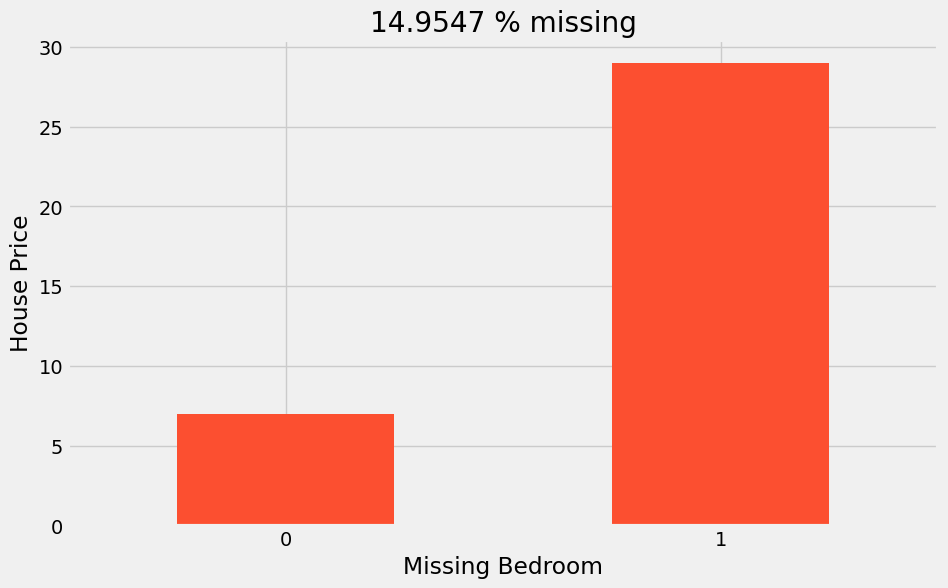

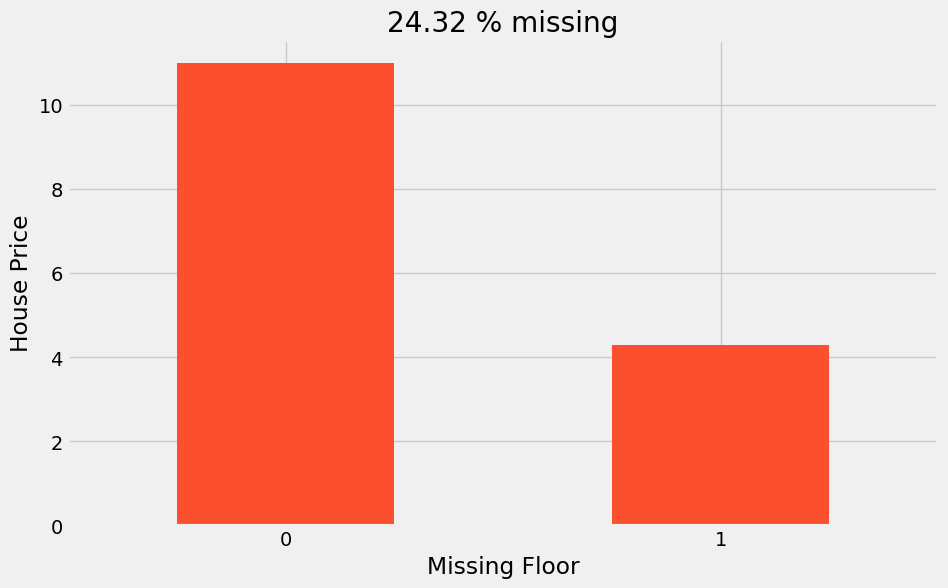

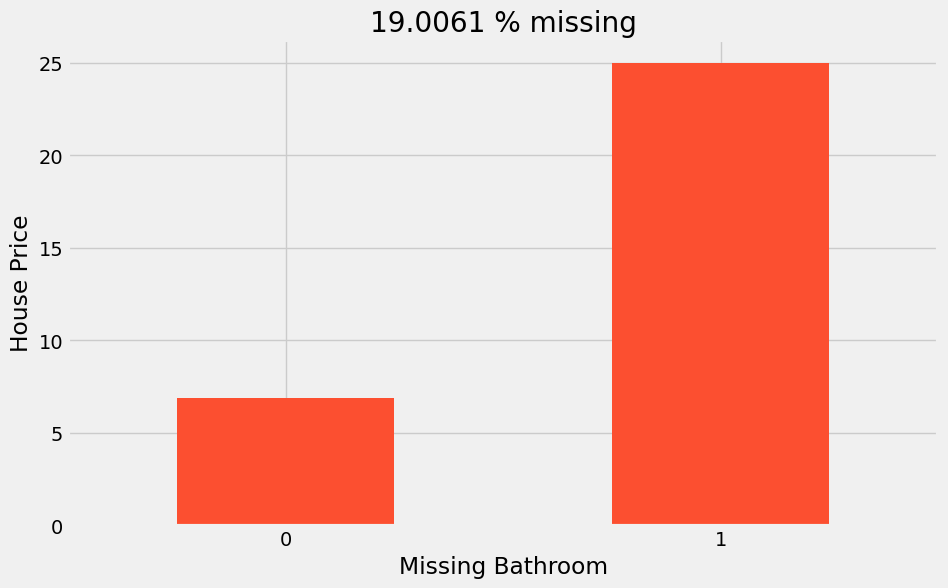

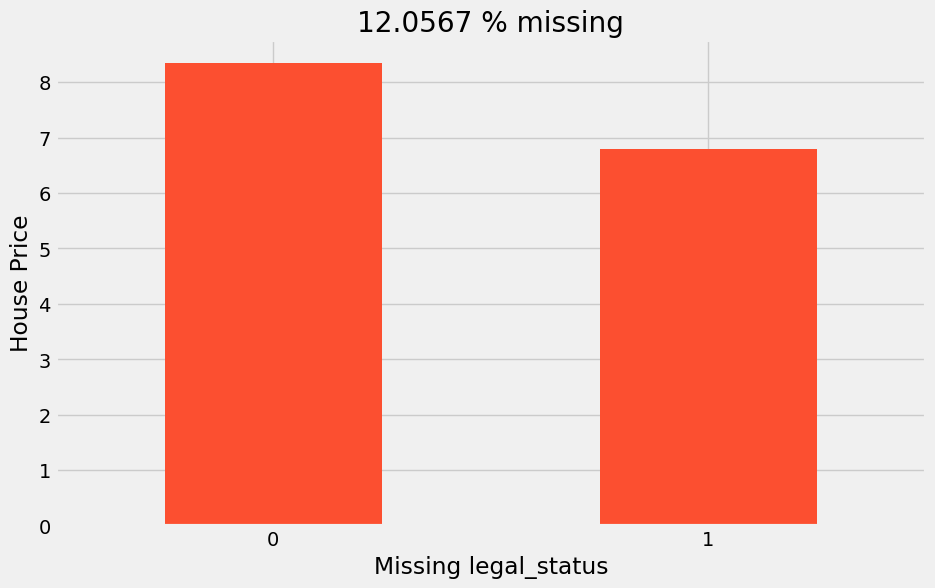

In [147]:
#Find the relationship between missing values and the House Price
for feature in features_with_na:
    data = df.copy()
    #Make a variable that indicates 1 if the observations was missing and 0 if not
    data[feature] = np.where(data[feature].isnull(),1,0)
    #Calculate the mean Price where the information is missing or not
    data.groupby(feature)['Price'].median().plot(kind='bar',figsize=(10,6),color=mypal[1])
    plt.ylabel('House Price')
    plt.xlabel(f'Missing {feature}')
    plt.xticks(rotation=0)
    plt.title(f'{np.round(df[feature].isnull().mean()*100,4)} % missing')
    plt.show()

Numerical variables

In [148]:
#List of numerical variables
numerical_features = list(df.select_dtypes(include=['float','int']).columns)
print(f'Number of numerical variables: {len(numerical_features)}')
#Visualize the numerical variables
df[numerical_features].head()

Number of numerical variables: 18


,Price,Land Area,Bedroom,Floor,Bathroom,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Is Land,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale,Price/m2
0,69.0,210.0,NaN,5.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.328571
2,22.0,72.0,8.0,4.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305556
3,25.0,213.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.117371
6,15.5,108.0,4.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.143519
7,6.2,50.0,4.0,3.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124000


In [149]:
#Display the summarize of descriptive statistics
df[numerical_features].describe()

,Price,Land Area,Bedroom,Floor,Bathroom,Furniture,Have Mezzanine,Have Rooftop,Have Basement,Is Land,Near Market,Near School,Near Hospital,Frontage,Securities Space,Have Car Park,Urgent Sale,Price/m2
count,17426.000000,17426.000000,14820.000000,13188.000000,14114.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,17426.000000,1.742600e+04
mean,18.158515,151.248663,4.045479,3.256369,3.852629,0.467233,0.086021,0.056812,0.182084,0.069609,0.274131,0.189602,0.082061,0.244003,0.152072,0.003615,0.115460,1.421438e-01
std,35.272692,848.837840,6.566387,1.936746,6.621079,0.498939,0.280403,0.231489,0.385925,0.254494,0.446088,0.391997,0.274466,0.429507,0.359101,0.060020,0.319585,1.322781e-01
min,0.001000,1.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.325131e-08
25%,4.590000,60.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.341248e-02
50%,8.000000,80.880000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064025e-01
75%,18.000000,126.000000,4.000000,4.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.755853e-01
max,799.000000,70000.000000,200.000000,24.000000,220.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.090909e+00


In [150]:
binary_features = [feature for feature in numerical_features if len(df[feature].dropna().unique())==2]
len(binary_features)

12

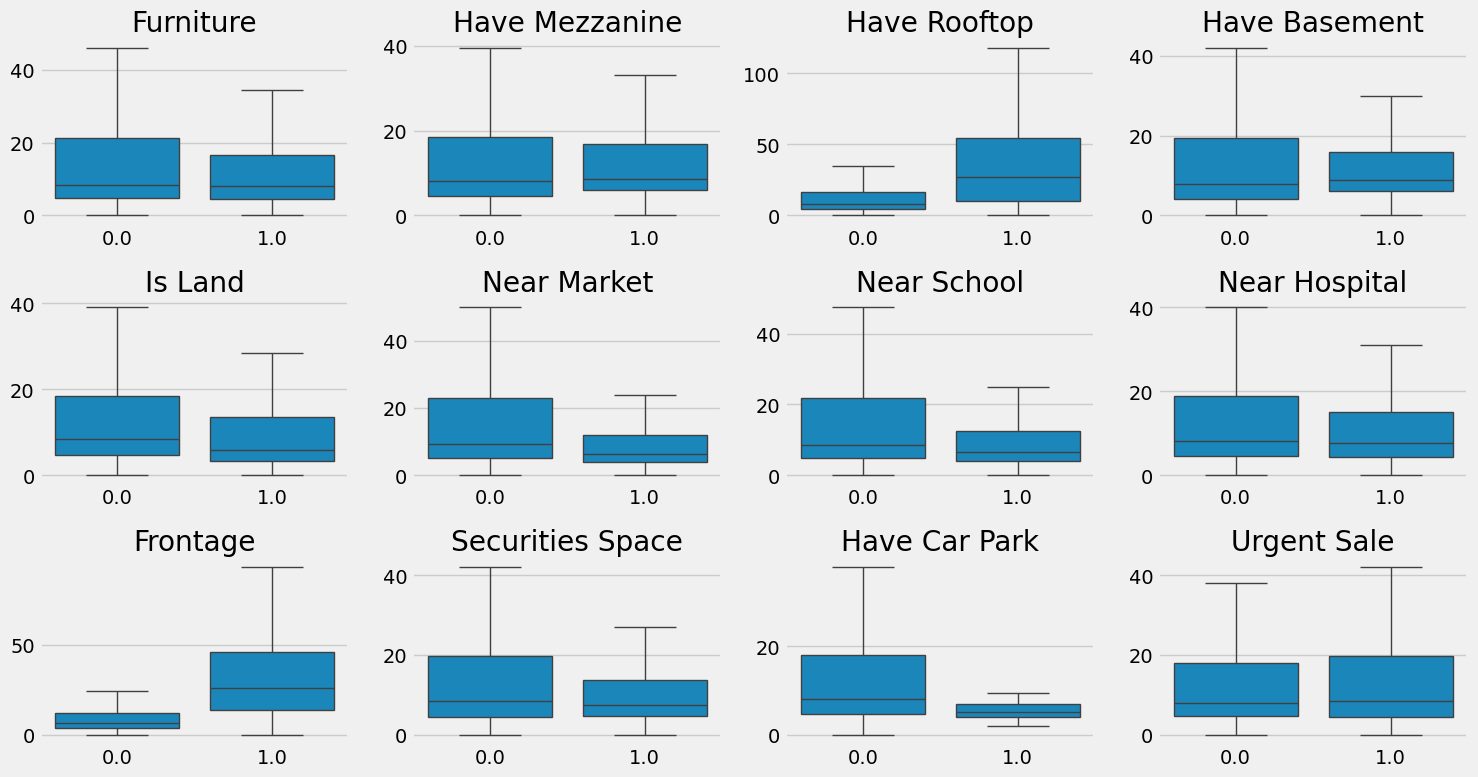

In [151]:
# Assuming binary_features and df are defined
num_features = len(binary_features)
rows = (num_features + 3) // 4  # Calculate needed rows

fig, axs = plt.subplots(rows, 4, figsize=(15, 8))
axs = axs.flatten()  # Flatten the array for easier indexing

for i, feature in enumerate(binary_features):
    sns.boxplot(x=feature, y='Price', data=df, showfliers=False, ax=axs[i])
    axs[i].set(ylabel='', xlabel='', title=feature)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [152]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<=100\
    and feature not in binary_features]
discrete_features

['Bedroom', 'Floor', 'Bathroom']

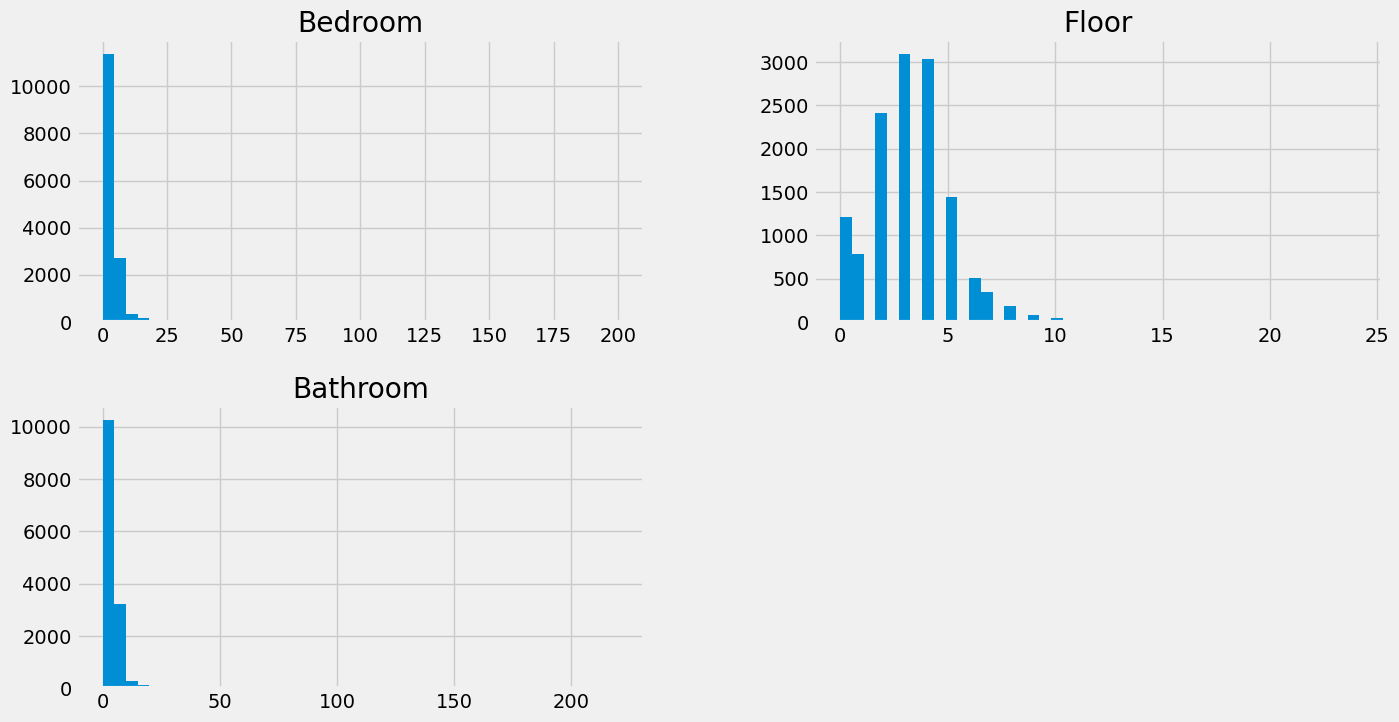

In [153]:
df[discrete_features].hist(bins=44,figsize=(15,8))
plt.show()

In [154]:
#Segment these discrete features
discrete_df = df[discrete_features]
discrete_df['Price'] = df['Price']
def room_mapping(room):
    if room == 0:
        return 'Land'
    elif room <= 5:
        return 'No more than 5'
    elif room <= 10:
        return 'No more than 10'
    elif room <= 20:
        return 'No more than 20'
    else:
        return 'More than 20'

def floor_mapping(floor):
    if floor == 0:
        return 'Land'
    elif floor <= 5:
        return 'No more than 5'
    else:
        return 'More than 5'

discrete_df['Bedroom'] = discrete_df['Bedroom'].apply(room_mapping)
discrete_df['Bathroom'] = discrete_df['Bathroom'].apply(room_mapping)
discrete_df['Floor'] = discrete_df['Floor'].apply(floor_mapping)

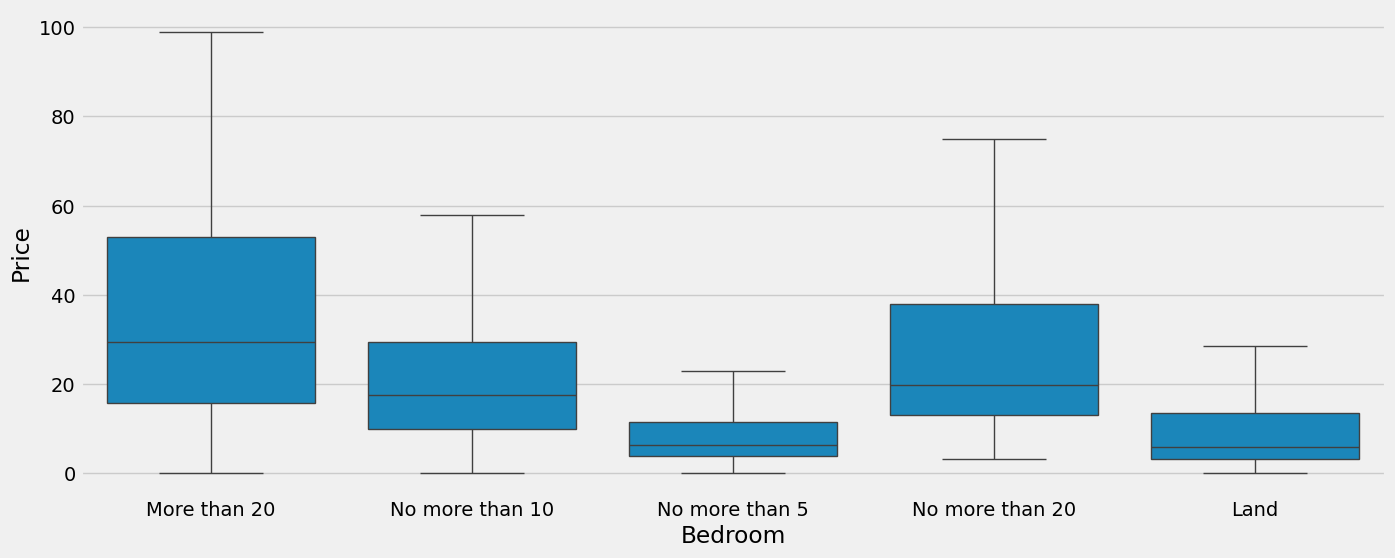

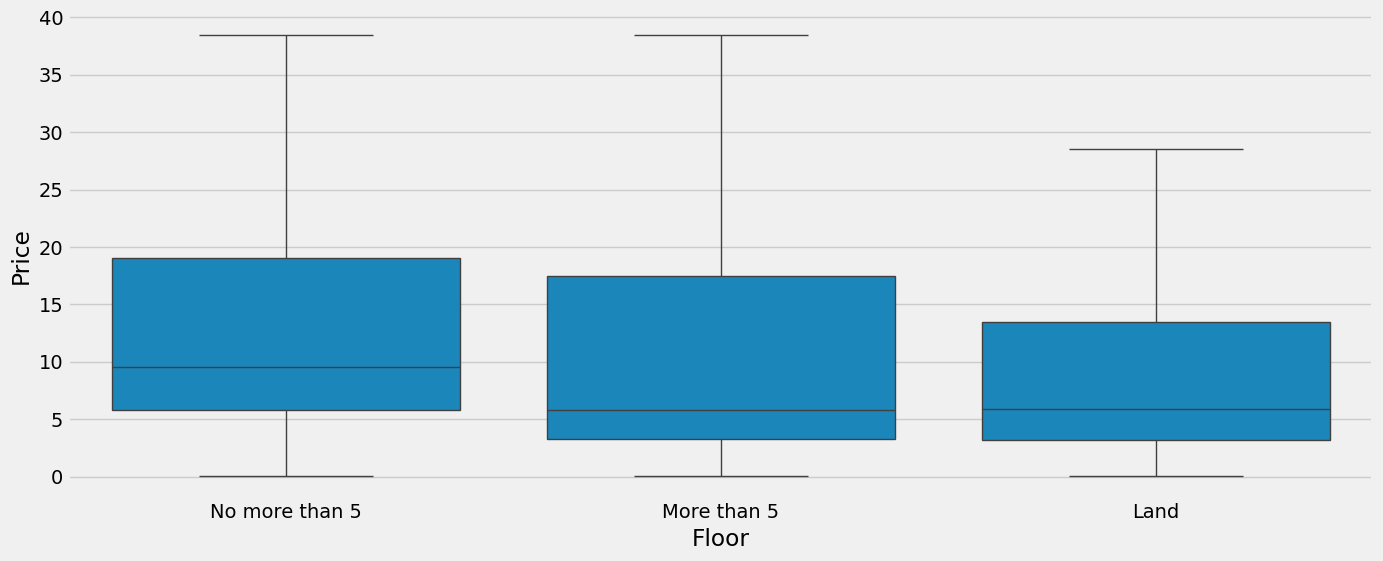

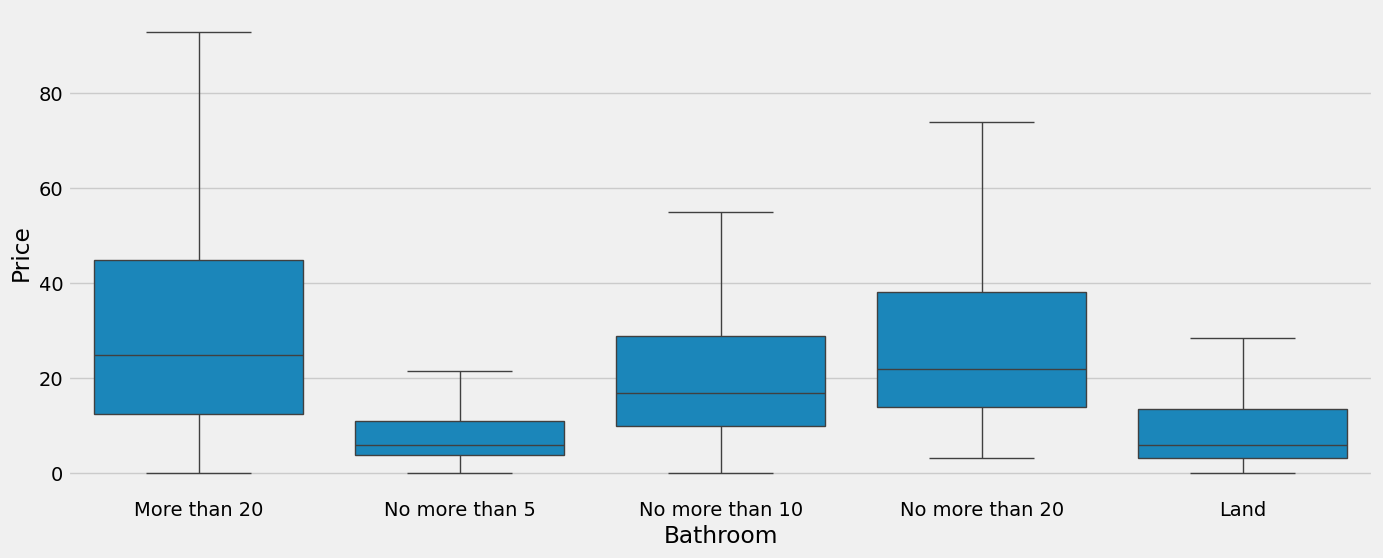

In [155]:
#Relationship between discrete variables and House Price
for feature in discrete_features:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=feature,y='Price',data=discrete_df,showfliers=False)
    plt.show()

In [156]:
continuous_features = [feature for feature in numerical_features if feature not in binary_features+discrete_features]
continuous_features

['Price', 'Land Area', 'Price/m2']

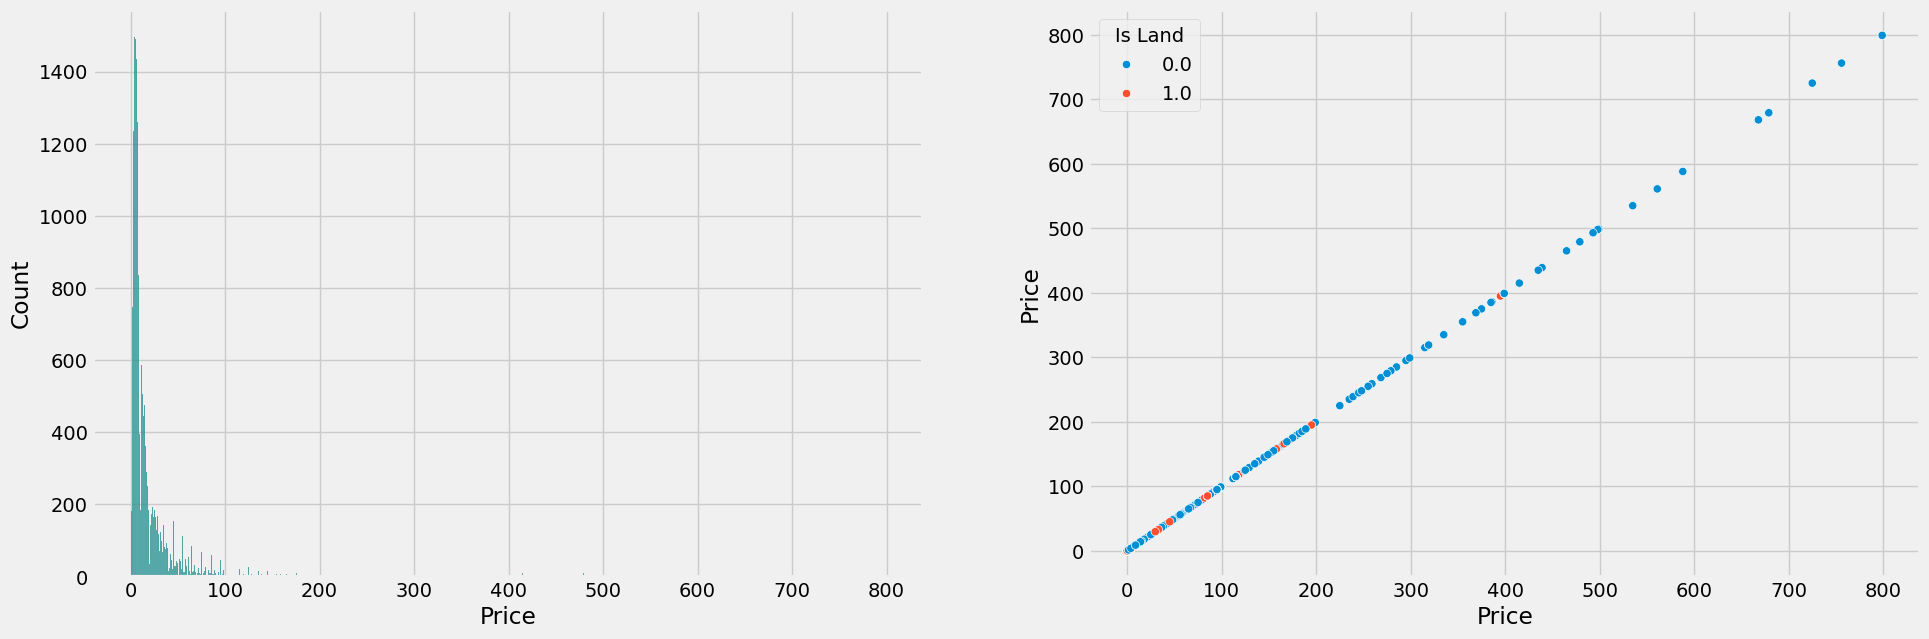

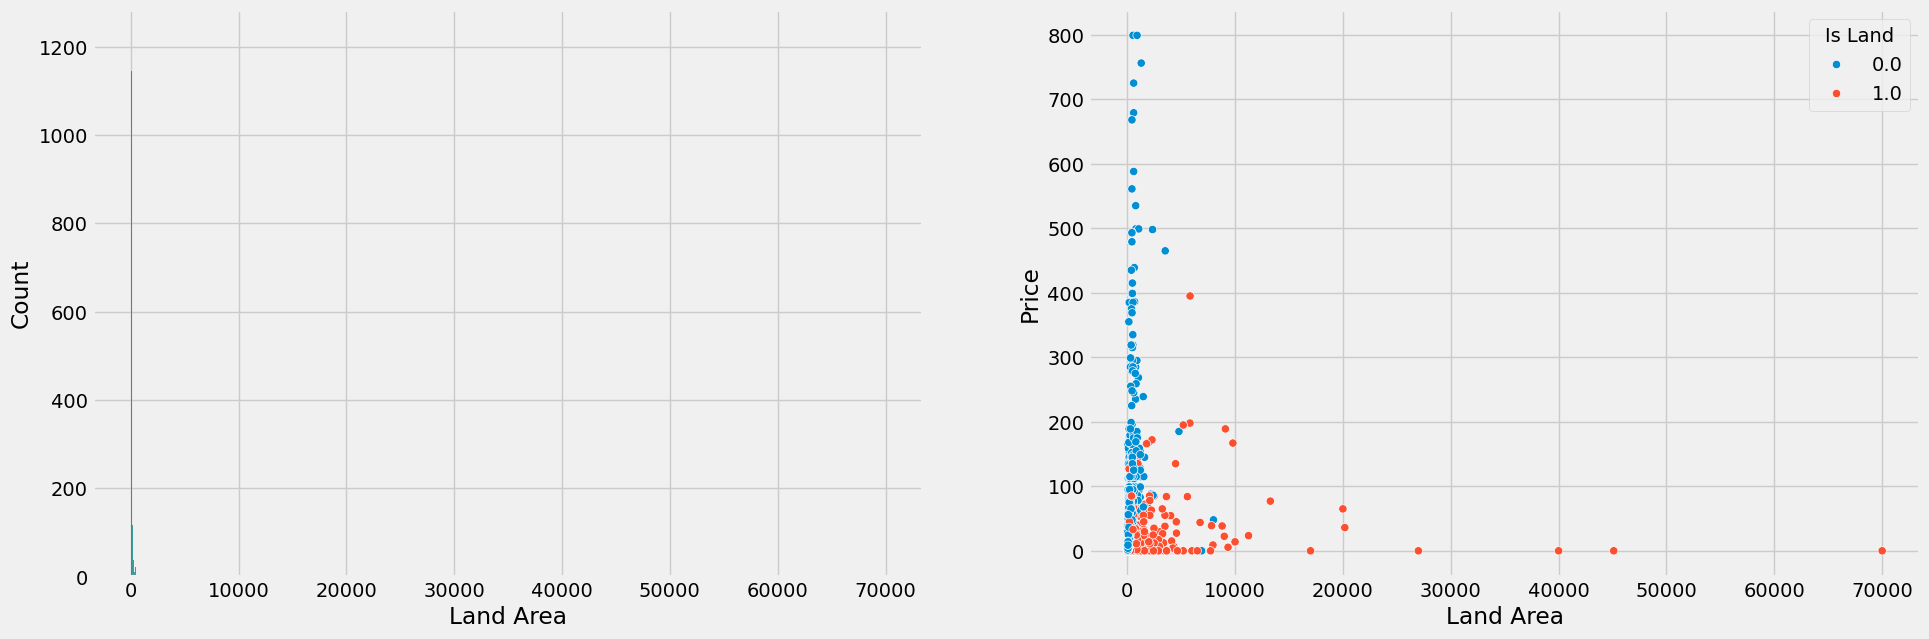

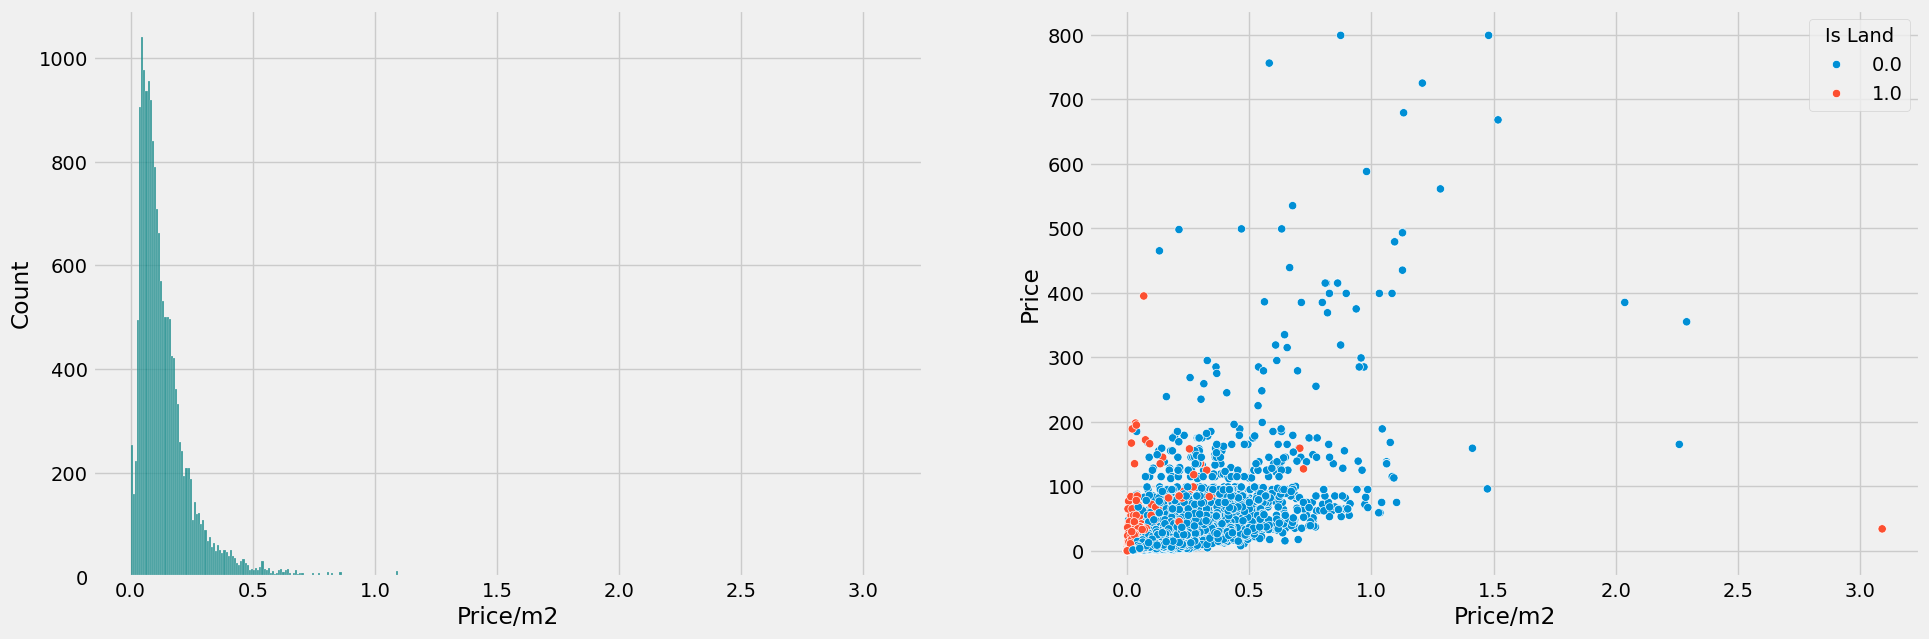

In [157]:
#Creating histogram to understand the distribution. Then analyze the relationship between the continuous values and House Price
for feature in continuous_features:
    plt.figure(figsize=(21,7))
    plt.subplot(121)
    sns.histplot(x=feature,data=df,color='teal')
    plt.subplot(122)
    sns.scatterplot(x=feature,y='Price',data=df,hue='Is Land')
    plt.show()

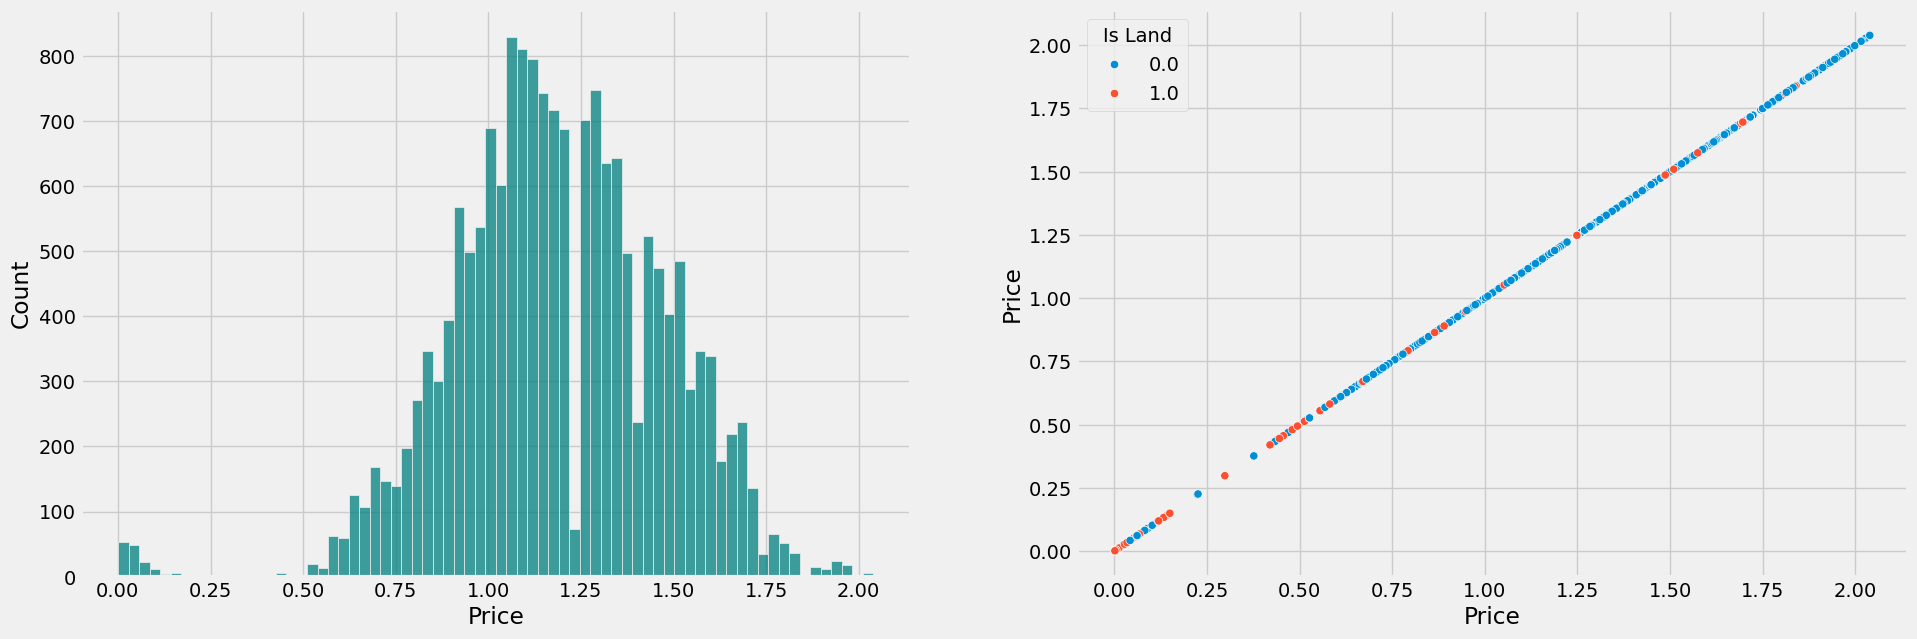

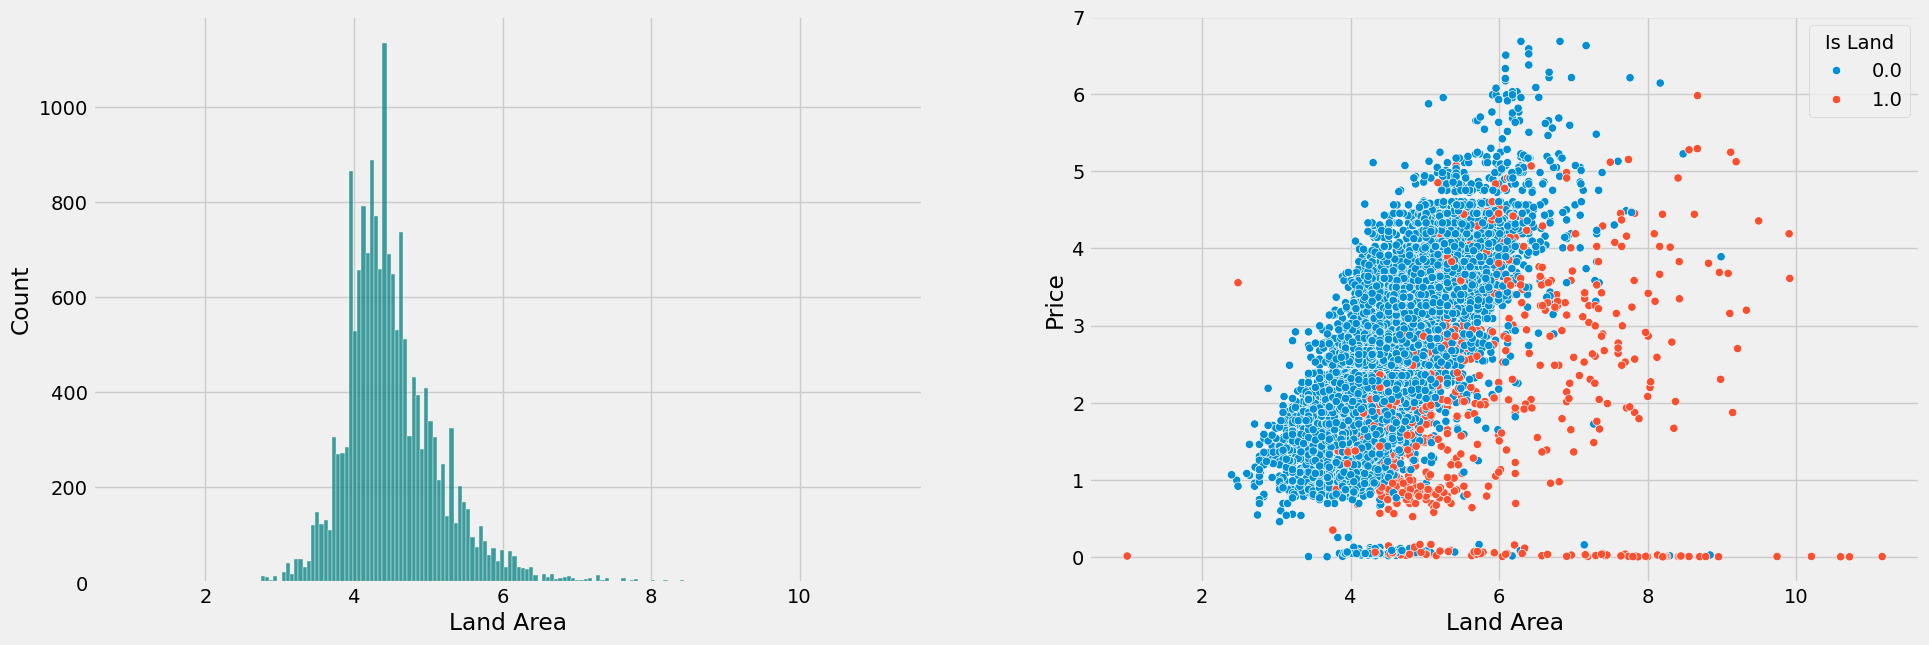

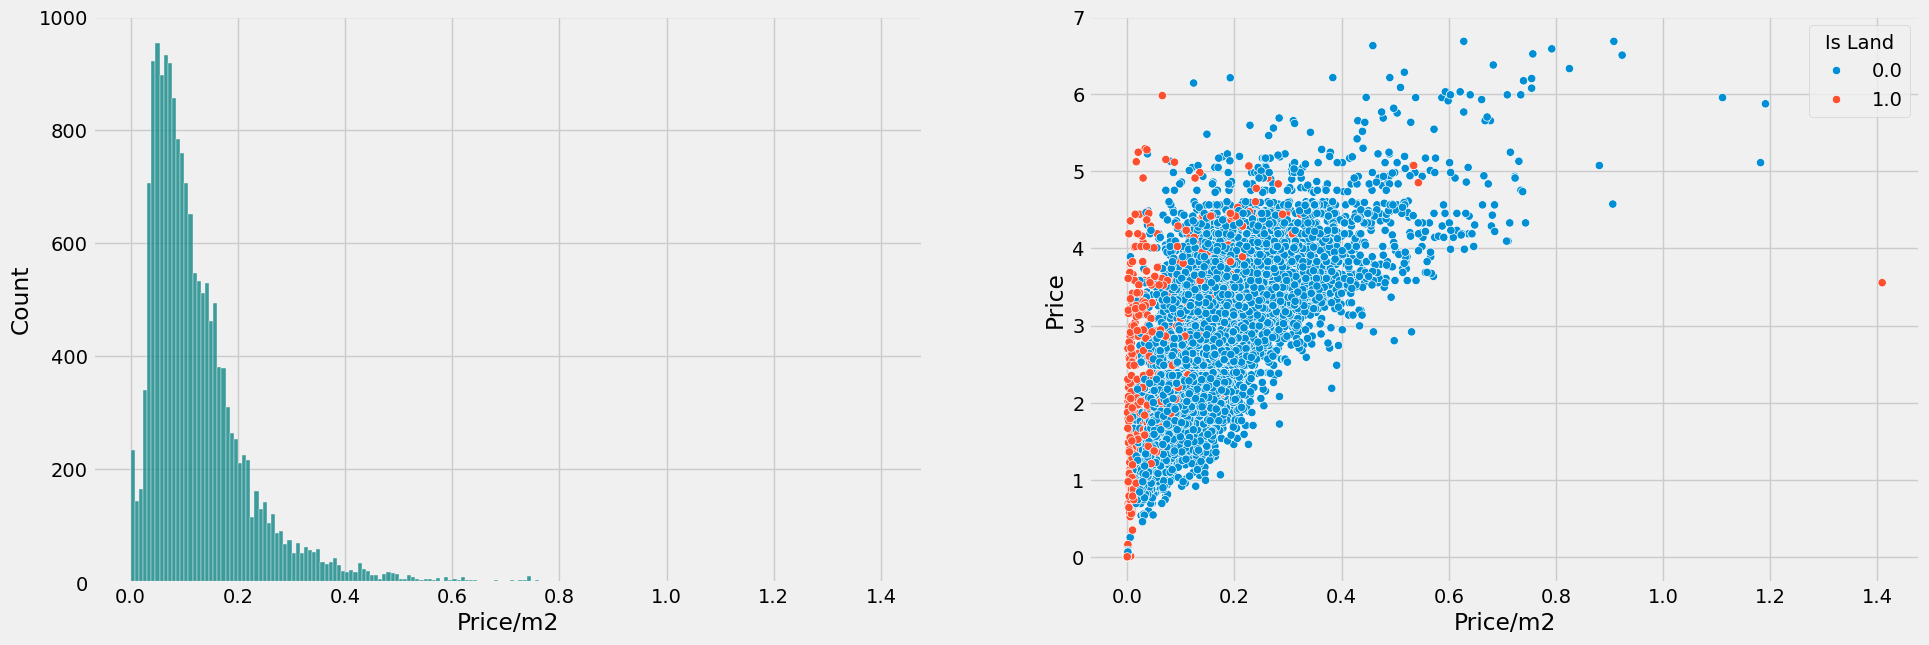

In [158]:
#Vì tất cả phân phối của các biến liên tục đều lệch phải nên chúng ta sẽ sử dụng phép biến đổi logarit cho các biến này
for feature in continuous_features:
    df_copy = df.copy()
    df_copy[feature] = np.log(df_copy[feature]+1)
    df_copy['Price'] = np.log(df_copy['Price']+1)
    plt.figure(figsize=(21,7))
    plt.subplot(121)
    sns.histplot(x=feature,data=df_copy,color='teal')
    plt.subplot(122)
    sns.scatterplot(x=feature,y='Price',data=df_copy,hue='Is Land')
    plt.show()

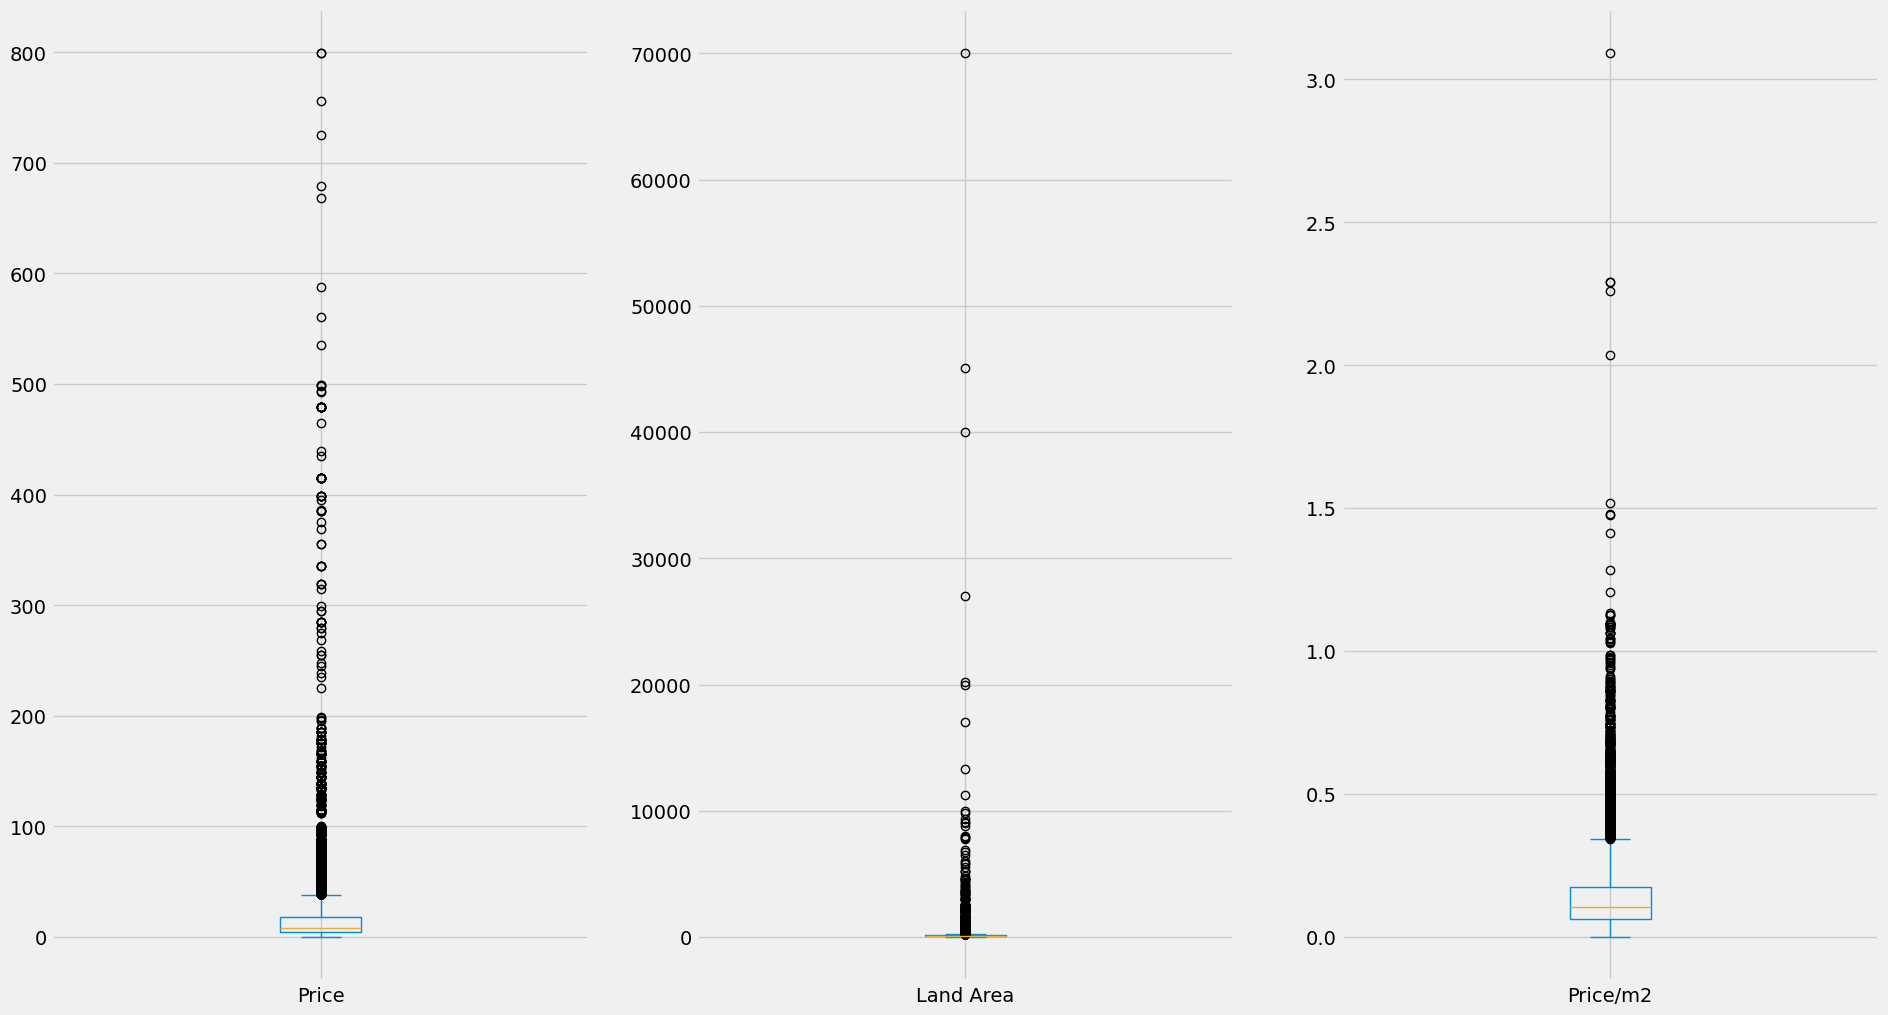

In [159]:
df[continuous_features].plot(kind='box',figsize=(21,12),subplots=True)
plt.show()

In [160]:
#List of categorical variables
categorical_features = list(df.select_dtypes(include='object').columns)
print(f'Number of categorical variables: {len(categorical_features)}')
#Visualize the categorical variables
df[categorical_features].head()


Number of categorical variables: 5


,District,Adress,Link,legal_status,Direction
0,quan 3,"Đường Lê Văn Sỹ, Phường 13",https://batdongsan.com.vn/ban-nha-mat-pho-duong-le-van-sy-phuong-13-1/ban-toa-dep-t-tien-dien-tich-9x23m-ket-cau-5-tang-cho-thue-260tr-gia-69-ty-pr40082613,Sổ đỏ/Sổ hồng,Không xác định
2,quan 1,"Đường Trần Hưng Đạo, Phường Cô Giang",https://batdongsan.com.vn/ban-nha-rieng-duong-tran-hung-dao-phuong-co-giang/ban-mat-tien-dinh-xu-p-q-1-dt-4mx14m-ket-cau-6-lau-gia-15-5-ty-pr35249519,Sổ đỏ/Sổ hồng,Không xác định
3,tan phu,"Đường 30/4, Phường Tân Thành",https://batdongsan.com.vn/ban-nha-mat-pho-duong-30-4-1-phuong-tan-thanh/chinh-chu-ban-mt-noi-bo-p-q-phu-213m2-10-x-22m-cap-4-25-ty-tl-pr40139128,Sổ đỏ/Sổ hồng,Nam
6,thu duc,"Dự án Vinhomes Grand Park, Phường Long Thạnh Mỹ",https://batdongsan.com.vn/ban-nha-biet-thu-lien-ke-phuong-long-thanh-my-prj-vinhomes-grand-park/sang-nhuong-gap-can-pho-108m-dat-duy-t-tai-park-pr40320712,Hợp đồng mua bán,Bắc
7,nha be,"Dự án The Sun Residence, Đường Đào Tông Nguyên, Thị trấn Nhà Bè",https://batdongsan.com.vn/ban-nha-rieng-duong-dao-tong-nguyen-thi-tran-nha-be-prj-the-sun-residence/-pho-hien-dai-day-du-noi-that-khu-dan-cu-huynh-tan-phat-gia-6-2-ty-4x13m-pr38111901,Sổ đỏ/Sổ hồng,Không xác định


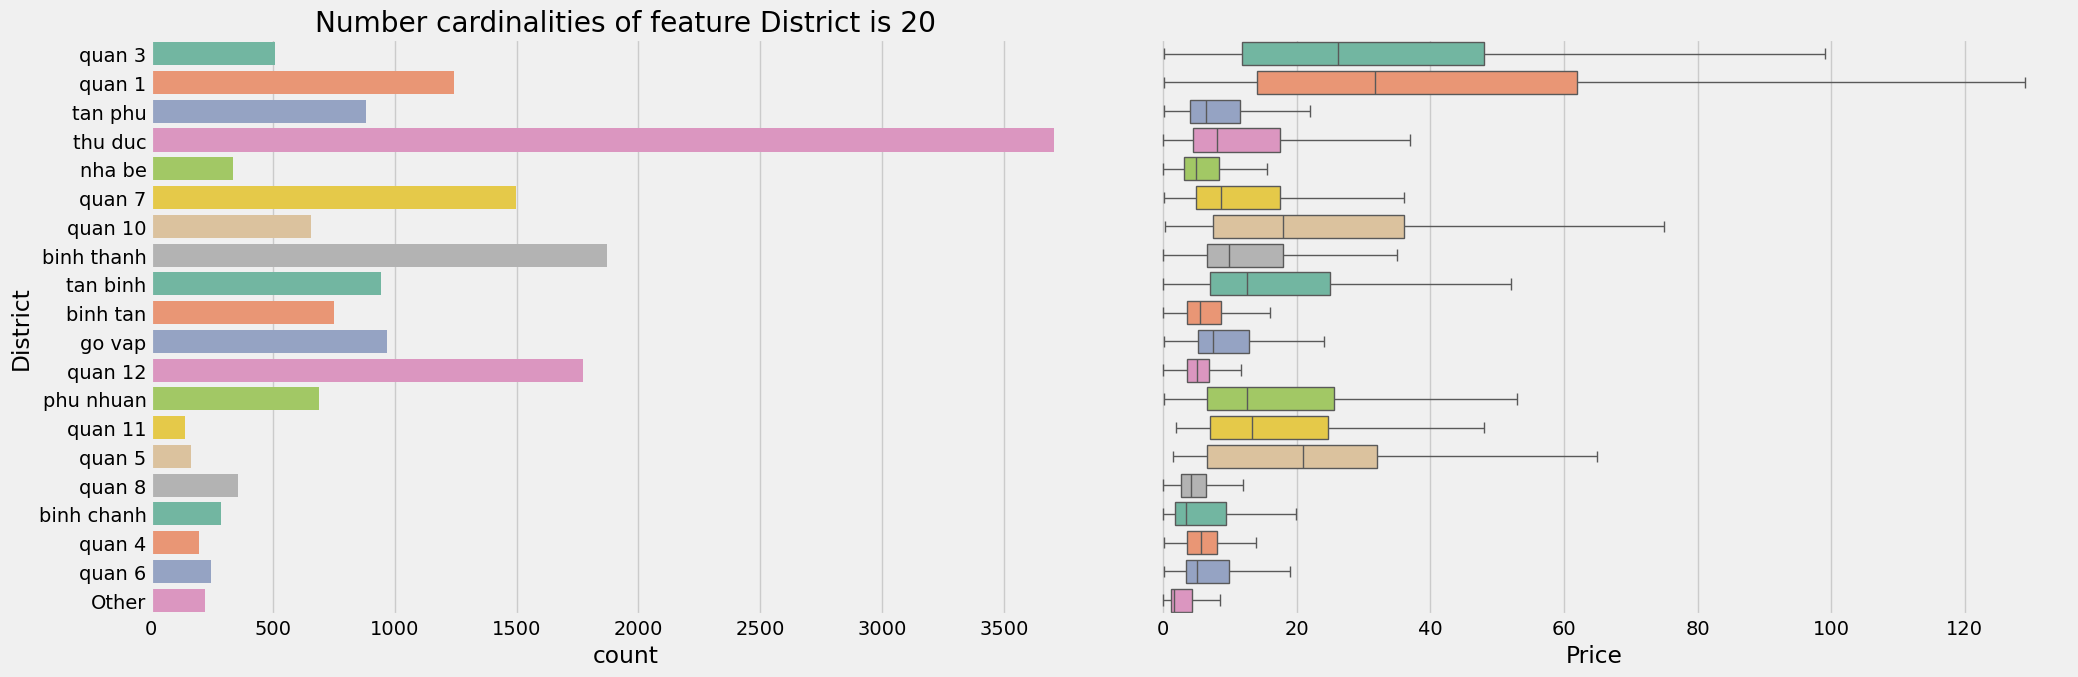

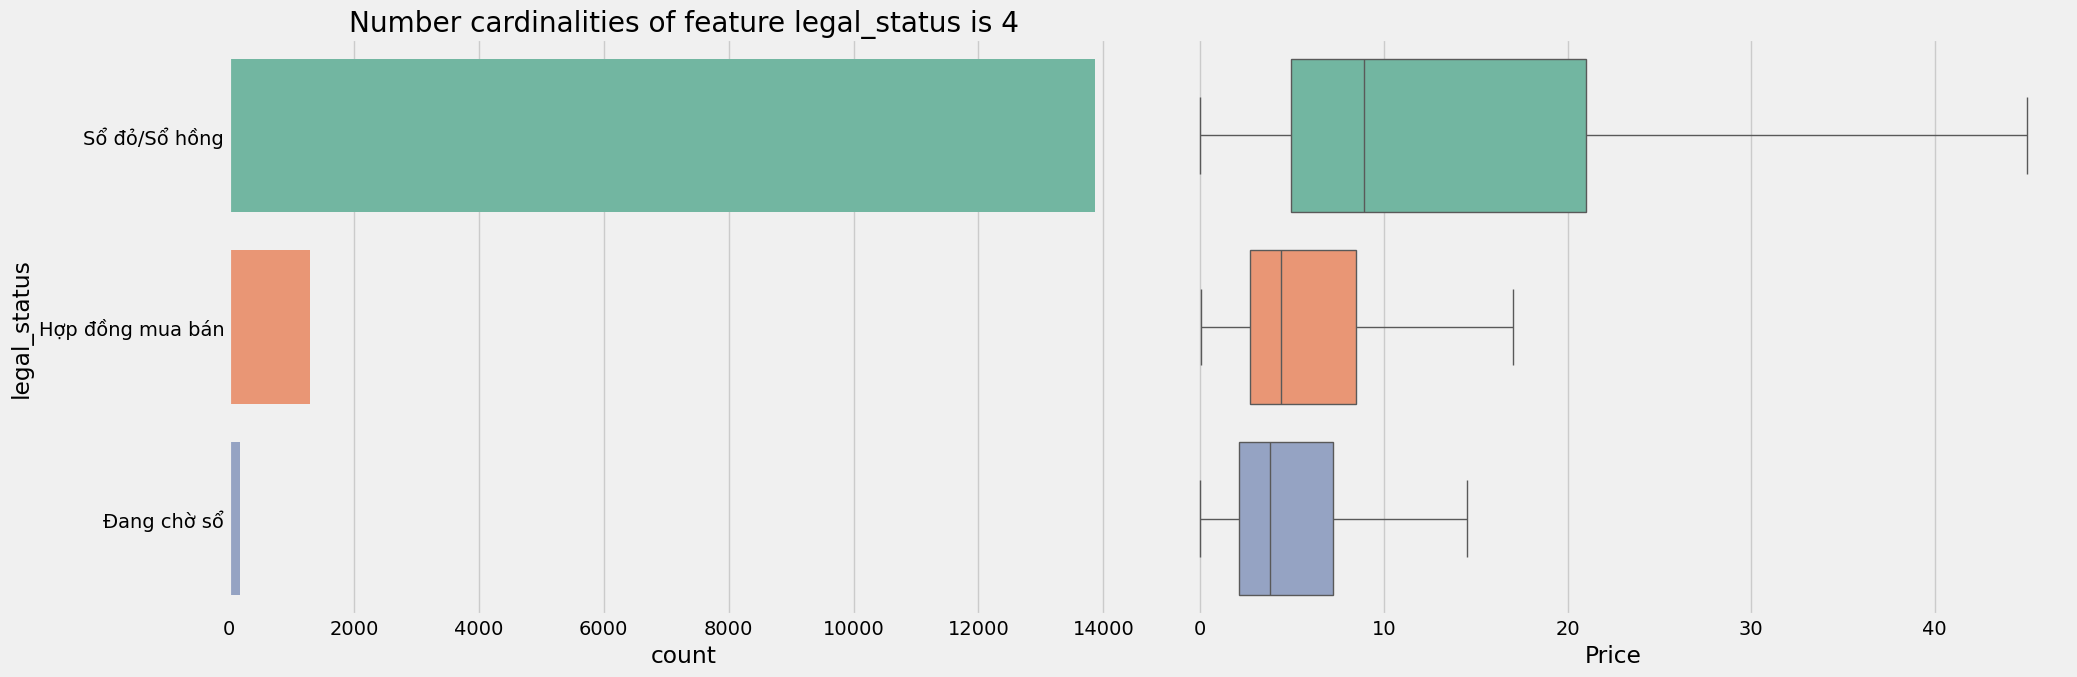

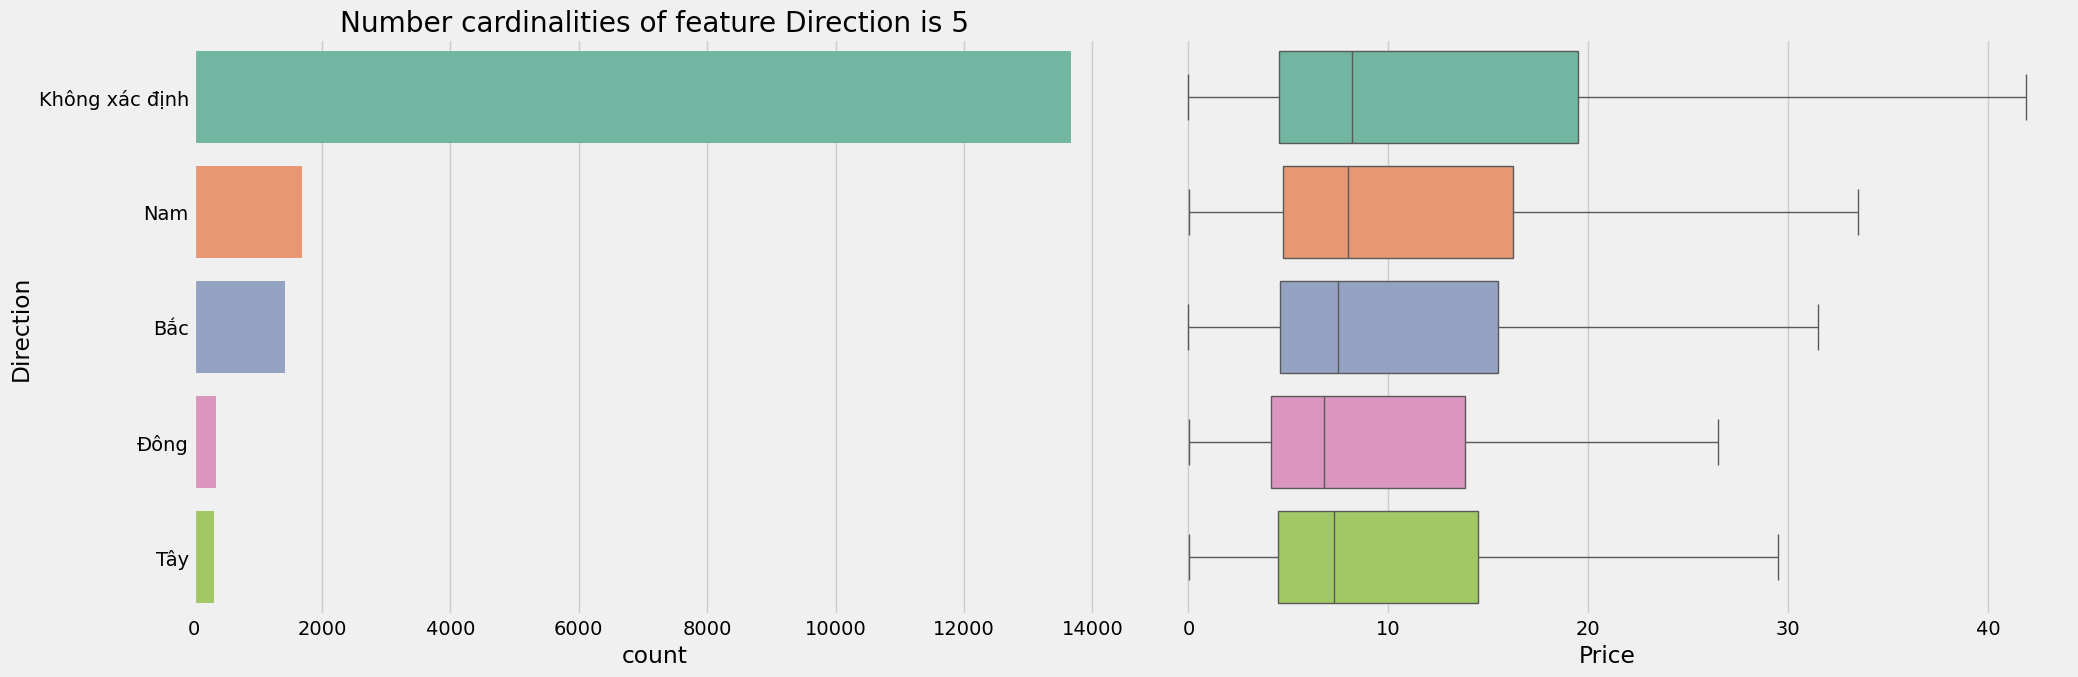

In [161]:
categorical_features = ['District', 'legal_status', 'Direction', 'Adress', 'Link']  # Thay thế bằng các cột phân loại của bạn

# Duyệt qua từng cột phân loại, bỏ qua 'Adress' và 'Link'
for feature in categorical_features:
    if feature not in ['Adress', 'Link']:
        df_copy = df.copy()
        fig, axs = plt.subplots(1, 2, figsize=(21, 7))
        
        # Biểu đồ đếm
        sns.countplot(y=feature, data=df_copy, palette='Set2', ax=axs[0])
        cardinality = len(df[feature].unique())
        axs[0].set_title(f'Number cardinalities of feature {feature} is {cardinality}')
        
        # Biểu đồ hộp
        sns.boxplot(y=feature, x='Price', data=df_copy, showfliers=False, palette='Set2', ax=axs[1])
        axs[1].get_yaxis().set_visible(False)
        
        plt.tight_layout()  # Tối ưu hóa bố cục của các biểu đồ
        plt.show()

In [162]:
df.to_csv('/Users/mac/crawdata/cleaned_data_new.csv',index=False)